In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(lsmeans))
#suppressPackageStartupMessages(library(car))
#suppressPackageStartupMessages(library(multcomp))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(export))

In [587]:
getwd()

[1] "/Users/yangzhang/Box/ppar/PPAR/manuscript/figures/figure2"

# 1. Import data

#### metabolic cage

In [369]:
profile <- read.csv(file = "stat_corrected.csv", as.is = TRUE)
profile$Diet <- as.factor(profile$Diet)
profile$Diet <- factor(profile$Diet, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
profile$MouseID <- ordered(profile$MouseID)
profile$MouseID <- as.factor(profile$MouseID)
head(profile)

Time               Diet Cycle MouseID EE        VO2      VCO2     VH2O      
1 Cycle1:06:00-07:00 LFD  light 1       0.5404855 1.817773 1.667495 0.07543786
2 Cycle1:07:00-08:00 LFD  light 1       0.4461322 1.506156 1.356034 0.09581117
3 Cycle1:08:00-09:00 LFD  light 1       0.3800183 1.302917 1.083944 0.06242484
4 Cycle1:09:00-10:00 LFD  light 1       0.5073735 1.732713 1.471611 0.07426177
5 Cycle1:10:00-11:00 LFD  light 1       0.4239801 1.468392 1.156785 0.08923397
6 Cycle1:11:00-12:00 LFD  light 1       0.3796648 1.319942 1.017954 0.07234710
  RER       PedMeters AllMeters
1 0.9165888 184.6116  229.6441 
2 0.8918554 198.4950  246.6812 
3 0.8325571 198.9380  247.2423 
4 0.8477622 205.5662  254.9972 
5 0.7837234 219.1643  271.8802 
6 0.7704386 219.5274  272.3832

#### phenotypes

In [601]:
data <- read.csv("table3.csv", header = T); 
data$vars <- factor(data$Treatment, levels = c("LFD", "HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN"))
data$vars2 <- factor(data$Treatment, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
data <- data %>% mutate(lv_tot_tag = (LV_TAG * liver_wt)/1000,
                        EE_norm = avgEE*1000/Lean_mass, 
                        fecal_tot_tag = TG_feces2*fecal_tot_output, 
                        kkcal = Cal_cum/1000,
                        uptake_f = uptake_freq_light + uptake_freq_dark,
                        allMeters = allmeters_light+allmeters_dark,
                        allPeds = pedmeters_light+pedmeters_dark,
                        rest_fat = Fat_mass - lv_tot_tag/1000 - (TG_feces*fecal_tot_output)/1000 - plasma_TAG*58.5*(wt/1000)/(100*1000))#; head(data)
txn <- data %>% filter(vars2 == "HFD+TXN"); hfd <- data %>% filter(vars2 == "HFD");
lxn <- data %>% filter(vars2 == "HFD+LXN"); hxn <- data %>% filter(vars2 == "HFD+HXN");
lfd <- data %>% filter(vars2 == "LFD")

#### GTT

In [436]:
GTT2 <- read.csv(file = "GTT2.csv", as.is = TRUE)
GTT2$treatment <- as.factor(GTT2$treatment)
GTT2$treatment <- factor(GTT2$treatment, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
GTT2$id <- ordered(GTT2$id)
GTT2$id <- as.factor(GTT2$id)

In [441]:
AUC2 <- read.csv(file = "AUC2.csv", as.is = TRUE)
AUC2$treatment <- as.factor(AUC2$treatment)
AUC2$treatment <- factor(AUC2$treatment, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
AUC2$id <- ordered(AUC2$id)
AUC2$id <- as.factor(AUC2$id)

# 2. Set theme, import functions

#### colors and themes

In [536]:
mycolor <- c("#0080ff", "#ffa500", "red", "darkgreen", "black")
mycolor_alpha <- c("#8AB5F9", "#F8CB89", "#F08581", "#87A57E", "#797979")
lines <- c("solid", "solid", "solid", "solid", "dashed")
shapes <- c(24, 4, 15, 25,1)
theme_set(theme_bw())
theme_legend = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=10)),
    plot.title = element_text(size = 15, face = "bold"),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_blank(),
	axis.ticks.x = element_blank(),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = "right",
	plot.margin = unit(c(1,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

theme_legend2 = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=5)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_text(size = 13),
	axis.title.x = element_text(size = 15,
                               margin = margin(t=10, r=5, b=0, l=0)),
    plot.title = element_text(size = 15, face = "bold"),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = "none",
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

theme_legend3 = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=5)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_blank(),
	axis.ticks.x = element_blank(),
    plot.title = element_text(size = 15, face = "bold"),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = "right",
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

theme_legend_free = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_blank(),
    plot.title = element_text(size = 15, face = "bold"),
	axis.ticks.x = element_blank(),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = "none",
	plot.margin = unit(c(1,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

In [5]:
Contrasts <- list(
    'TXN vs HFD' = c(-1, 0, 0, 1, 0),
    'HXN vs HFD' = c(-1, 0, 1, 0, 0),
    'LFD vs HFD' = c(-1, 0, 0, 0, 1),
    'TXN vs LFD' = c(0, 0, 0, 1, -1),
    'LXN vs HFD' = c(-1, 1, 0, 0, 0))

Contrasts1 <- list(
    'HFD vs LFD' = c(1, 0, 0, 0, -1),
    'LXN vs LFD' = c(0, 1, 0, 0, -1),
    'HXN vs LFD' = c(0, 0, 1, 0, -1),
    'TXN vs LFD' = c(0, 0, 0, 1, -1),
    'TXN vs HFD' = c(1, 0, 0, 1, 0))


median_RQ_lt <- profile %>% group_by(MouseID, Diet, Cycle) %>% summarise(medRQ = median(RQ)) %>% filter(Cycle=="light")
median_RQ_dk<- profile %>% group_by(MouseID, Diet, Cycle) %>% summarise(medRQ = median(RQ)) %>% filter(Cycle=="dark")

median_EE_lt <- profile %>% group_by(MouseID, Diet, Cycle) %>% summarise(medEE = median(EE)) %>% filter(Cycle=="light")
median_EE_dk<- profile %>% group_by(MouseID, Diet, Cycle) %>% summarise(medEE = median(EE)) %>% filter(Cycle=="dark")

In [6]:
.ci <-
function(x,conf.level=0.95) {
  tri <- sort(na.omit(x))
  if (any(!is.finite(tri))) {tri <- tri[-which(!is.finite(tri))]}
  repet <- length(tri)
  int <- (1-conf.level)/2
  if(repet*int<1) {
    int.inf <- ceiling(repet*int)
  } else {
    int.inf <- floor(repet*int)
  }
  int.sup <- ceiling(repet*(1-int))
  result <- c("Inf"=tri[int.inf],"Sup"=tri[int.sup])
  return(result)
}

spearman.ci <-
function(var1,var2,nrep=1000,conf.level=0.95){
  if (length(var1)!=length(var2)) {stop(paste("'",deparse(substitute(var1)),"' and '",
    deparse(substitute(var2)),"' lengths differ",sep=""))}
  data.name <- paste(deparse(substitute(var1))," and ",deparse(substitute(var2)),"\n",nrep," replicates",sep="")
  nul <- as.numeric(row.names(table(c(which(is.na(var1)),which(is.na(var2))))))
  var1.2 <- if(length(nul)>0) {var1[-nul]} else {var1}
  var2.2 <- if(length(nul)>0) {var2[-nul]} else {var2}
  cor.fun <- function(data,ind) {
    as.numeric(suppressWarnings(cor.test(data[ind,1],data[ind,2],method="spearman")$estimate))
  }
  simul <- boot::boot(data.frame(var1.2,var2.2),cor.fun,R=nrep)
  interval <- .ci(simul$t,conf.level=conf.level)
  attr(interval,"conf.level") <- conf.level
  coeff <- as.numeric(suppressWarnings(cor.test(var1,var2,method="spearman")$estimate))
  names(coeff) <- "rho"
  result <- list(method="Spearman's rank correlation",conf.level=conf.level,rep=nrep,data.name=data.name,
    estimate=coeff,conf.int=interval)
  class(result) <- "htest"
  return(result)
}

pearson.ci <-
function(var1,var2,nrep=1000,conf.level=0.95){
  if (length(var1)!=length(var2)) {stop(paste("'",deparse(substitute(var1)),"' and '",
    deparse(substitute(var2)),"' lengths differ",sep=""))}
  data.name <- paste(deparse(substitute(var1))," and ",deparse(substitute(var2)),"\n",nrep," replicates",sep="")
  nul <- as.numeric(row.names(table(c(which(is.na(var1)),which(is.na(var2))))))
  var1.2 <- if(length(nul)>0) {var1[-nul]} else {var1}
  var2.2 <- if(length(nul)>0) {var2[-nul]} else {var2}
  cor.fun <- function(data,ind) {
    as.numeric(suppressWarnings(cor.test(data[ind,1],data[ind,2],method="pearson")$estimate))
  }
  simul <- boot::boot(data.frame(var1.2,var2.2),cor.fun,R=nrep)
  interval <- .ci(simul$t,conf.level=conf.level)
  attr(interval,"conf.level") <- conf.level
  coeff <- as.numeric(suppressWarnings(cor.test(var1,var2,method="pearson")$estimate))
  names(coeff) <- "rho"
  result <- list(method="pearson correlation",conf.level=conf.level,rep=nrep,data.name=data.name,
    estimate=coeff,conf.int=interval)
  class(result) <- "htest"
  return(result)
}

#### ggplotRegression

In [252]:
ggplotRegression2 <- function (fit, cols) {
    
    ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
          geom_point(size = 4, color = cols, alpha = 0.6) +
          stat_smooth(method = "lm", col = "black", geom = "smooth", fill = "#303F9F", alpha = 0.2, linetype = "dashed") +
          labs(subtitle = paste("R = ",signif(sqrt(summary(fit)$r.squared), 3),
                                " P =",signif(summary(fit)$coef[2,4], 2),
                               "\nIntercept =",signif(fit$coef[[1]],2 ),
                                 " Slope =",signif(fit$coef[[2]], 2))) #+
          #theme(axis.title = element_text(size= 20, face = 'bold'),
          #axis.text = element_text(size = 18))
}

# 3. GTT & Plasma stuff

In [503]:
l2 <- ggline(GTT2, x = "timepoint", y = "glucose", group = "treatment",
           add = "mean_se", color = "treatment", palette = mycolor,
           ylab = "Circulating Glucose (mg/dL)", xlab = "Time (min)",
           linetype = "treatment", shape = "treatment",
           point.size = 1.5,
           ggtheme = theme_bw())

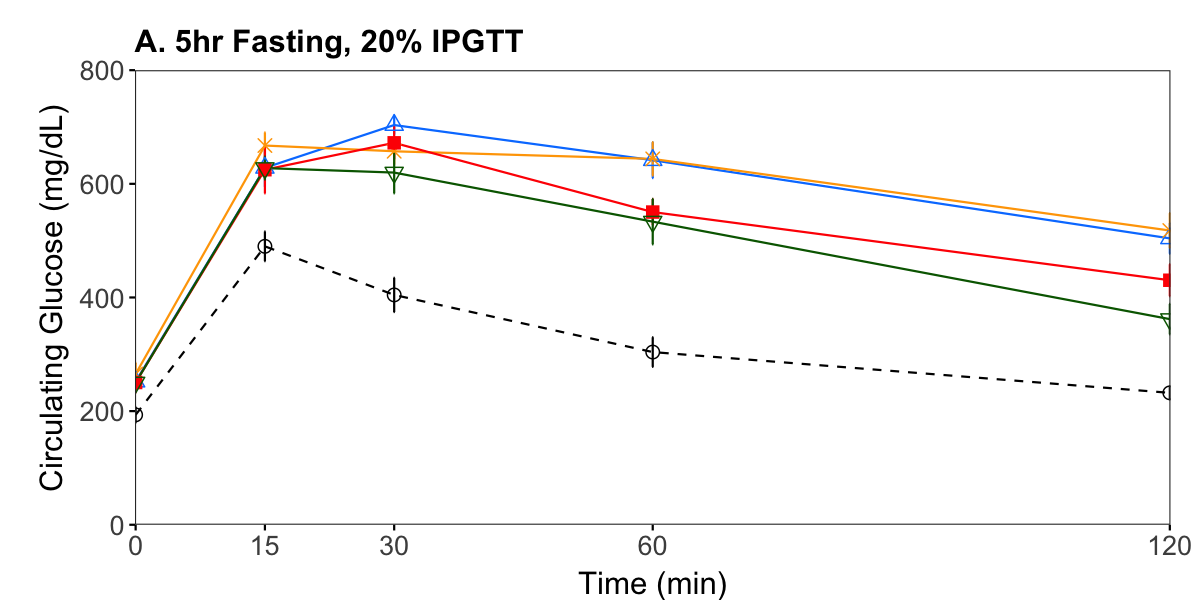

In [522]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 150)
A <- l2 + scale_shape_manual(values = shapes) +
          scale_linetype_manual(values=lines) + 
          ggtitle("A. 5hr Fasting, 20% IPGTT") +
          scale_x_continuous(breaks = c(0, 15, 30, 60, 120), expand = c(0,0)) +
          scale_y_continuous(expand = c(0,0), limits = c(0, 800)) + 
          theme(axis.title.y = element_text(size = 15, margin = margin(t=0, r=5, b=0, l=5)),
                axis.title.x = element_text(size = 15, margin = margin(t=5, r=5, b=0, l=0)),
                axis.text.y = element_text(size = 13),
                axis.text.x = element_text(size = 13),
                plot.title = element_text(size = 15, face = "bold"),
                legend.position = "none",
                plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
                panel.grid = element_blank())
A

In [447]:
model <- lm(AUC_tot ~ treatment, data = AUC2)
leastsquare <- lsmeans(model, "treatment")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate   SE df t.ratio p.value
 TXN vs HFD    -5341 1745 54 -3.061  0.0034 
 HXN vs HFD    -3455 1707 54 -2.024  0.0479 
 LFD vs HFD   -13085 1707 54 -7.667  <.0001 
 TXN vs LFD     7744 1745 54  4.438  <.0001 
 LXN vs HFD     -620 1707 54 -0.363  0.7179 


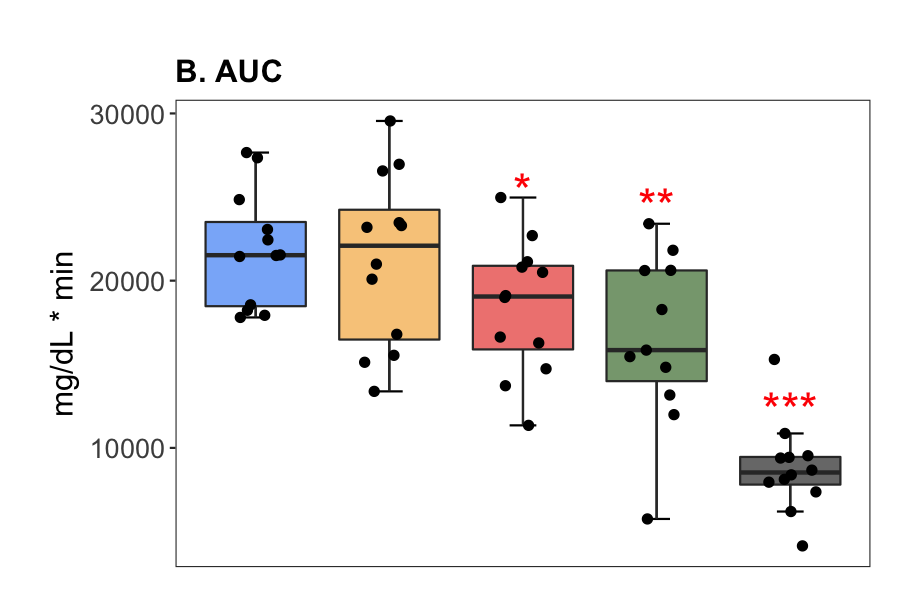

In [537]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)
B <- ggplot(data = AUC2, aes(x = treatment, y = AUC_tot, fill = treatment)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="mg/dL * min",title="B. AUC") +
	theme_legend_free()

label.df <- data.frame(treatment = c("HFD+HXN", "HFD+TXN", "LFD"),
                       AUC_tot = c(25400, 24500, 12300))
B <- B + geom_text(data = label.df, label = c("*", "**", "***"), color='red', size = 8)
B

In [538]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 150)
parA <- (A + B) + plot_layout(width = c(2,1))

In [483]:
model <- lm(glucose_plasma ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate   SE df t.ratio p.value
 TXN vs HFD    -5.04 8.49 54 -0.594  0.5551 
 HXN vs HFD    -5.78 8.30 54 -0.696  0.4892 
 LFD vs HFD   -16.82 8.30 54 -2.026  0.0477 
 TXN vs LFD    11.78 8.49 54  1.388  0.1709 
 LXN vs HFD   -10.73 8.30 54 -1.293  0.2015 


In [514]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)
C <- ggplot(data = data, aes(x = vars2, y = glucose_plasma, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="mg/dL",title="C. Glucose") +
	theme_legend3()

label.df <- data.frame(vars2 = c("LFD"),
                       glucose_plasma = c(160))
C <- C + geom_text(data = label.df, label = c("*"), color='red', size = 8)

In [484]:
model <- lm(insulin_plasma ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD  -1.1136 0.364 54 -3.063  0.0034 
 HXN vs HFD  -0.5665 0.356 54 -1.593  0.1169 
 LFD vs HFD  -1.6207 0.356 54 -4.558  <.0001 
 TXN vs LFD   0.5071 0.364 54  1.395  0.1688 
 LXN vs HFD  -0.0131 0.356 54 -0.037  0.9708 


In [515]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)
D <- ggplot(data = data, aes(x = vars2, y = insulin_plasma, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="ng/mL",title="D. Insulin") +
	theme_legend3()
label.df <- data.frame(vars2 = c("HFD+TXN", "LFD"),
                       insulin_plasma = c(2, 1.5))
D <- D + geom_text(data = label.df, label = c("**", "***"), color='red', size = 8)

In [482]:
model <- lm(leptin_new ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD    -2.70 0.656 54 -4.106  0.0001 
 HXN vs HFD    -0.90 0.642 54 -1.401  0.1669 
 LFD vs HFD    -6.19 0.642 54 -9.639  <.0001 
 TXN vs LFD     3.49 0.656 54  5.321  <.0001 
 LXN vs HFD    -1.21 0.642 54 -1.882  0.0653 


In [516]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)
E <- ggplot(data = data, aes(x = vars2, y = leptin_new, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="ng/mL",title="E. Leptin") +
	theme_legend3()
label.df <- data.frame(vars2 = c("HFD+TXN", "LFD"),
                       leptin_new = c(2, 5))
E <- E + geom_text(data = label.df, label = c("***", "***"), color='red', size = 8)

In [485]:
model <- lm(plasma_TAG ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate   SE df t.ratio p.value
 TXN vs HFD   10.710 3.77 54  2.839  0.0064 
 HXN vs HFD    3.376 3.69 54  0.915  0.3643 
 LFD vs HFD   -0.126 3.69 54 -0.034  0.9730 
 TXN vs LFD   10.835 3.77 54  2.872  0.0058 
 LXN vs HFD    1.289 3.69 54  0.349  0.7283 


In [517]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)
F <- ggplot(data = data, aes(x = vars2, y = plasma_TAG, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="mg/dL",title="F. TAG") +
	theme_legend3()
label.df <- data.frame(vars2 = c("HFD+TXN"),
                       plasma_TAG = c(40))
F <- F + geom_text(data = label.df, label = c("**"), color='red', size = 8)

In [528]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)
parB <- ((C + D + E + F)) + plot_layout(nrow = 1)

#### Figure

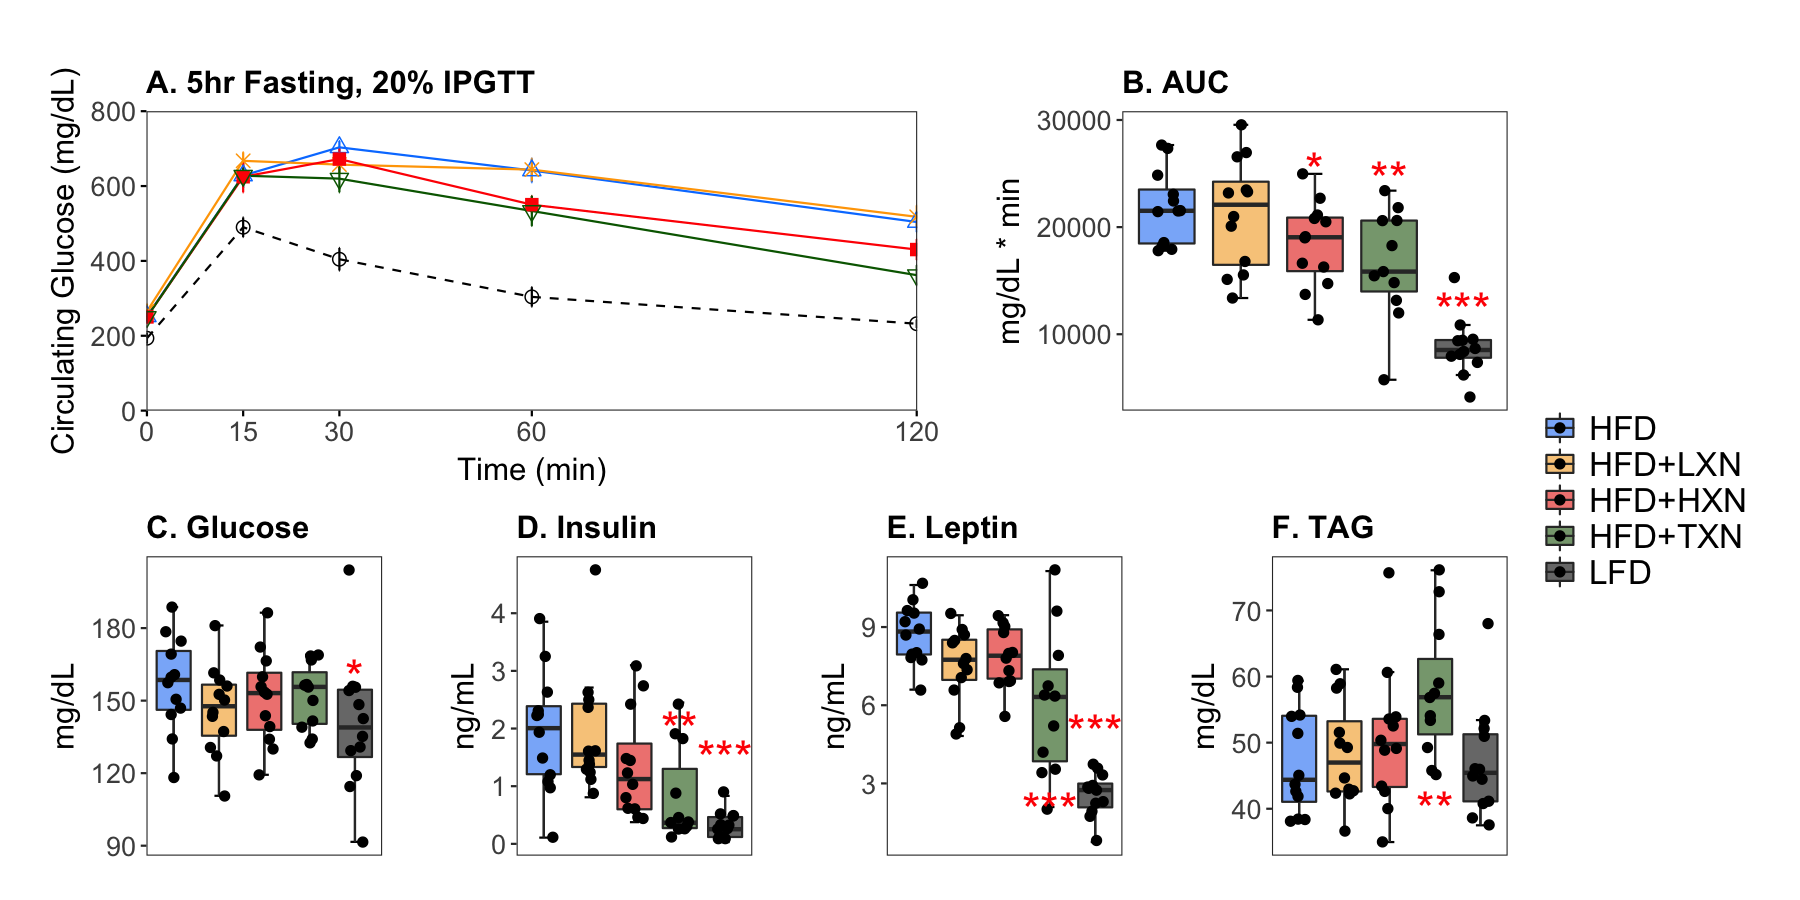

In [586]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)
(parA/parB) + plot_layout(height = c(1,1), guides = "collect")

# AUC unit?

# 4. Fat mass, hepatic TAG, EE and caloric intake

#### A. fat mass boxplot

In [541]:
A <- ggplot(data = data, aes(x = vars2, y = Fat_mass, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="g",title="A. Total fat mass") +
	theme_legend2()

label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       Fat_mass = c(21.4, 19.5, 14.2))
A <- A + geom_text(data = label.df, label = c("*", "***", "***"), color='red', size = 8)

#### B. Total hepatic TAG

In [542]:
B <- ggplot(data = data, aes(x = vars2, y = lv_tot_tag, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="g",title="B. Total hepatic TAG") +
	theme_legend2()
label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       lv_tot_tag = c(2.5, 0.9, 1))
B <- B + geom_text(data = label.df, label = c("**", "***", "***"), color='red', size = 8)

In [543]:
B <- ggplot(data = data, aes(x = vars2, y = lipidosis_area_pct, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="%",title="B. Hepatic lipidosis area percent") +
	theme_legend2()
label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN"),
                       lipidosis_area_pct = c(22, 20))
B <- B + geom_text(data = label.df, label = c("*", "**"), color='red', size = 8)

In [544]:
model <- lm(lipidosis_area_pct ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate   SE df t.ratio p.value
 TXN vs HFD    -9.24 2.88 54 -3.209  0.0022 
 HXN vs HFD    -6.27 2.82 54 -2.228  0.0301 
 LFD vs HFD    -3.98 2.82 54 -1.414  0.1630 
 TXN vs LFD    -5.26 2.88 54 -1.826  0.0734 
 LXN vs HFD    -2.81 2.82 54 -0.998  0.3225 


In [49]:
model <- lm(lv_tot_tag ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD  -1.0544 0.196 54 -5.370  <.0001 
 HXN vs HFD  -0.5294 0.192 54 -2.757  0.0079 
 LFD vs HFD  -1.0113 0.192 54 -5.266  <.0001 
 TXN vs LFD  -0.0431 0.196 54 -0.219  0.8271 
 LXN vs HFD  -0.2934 0.192 54 -1.528  0.1324 


#### C. average energy expenditure

In [545]:
C <- ggplot(data = data, aes(x = vars2, y = avgEE2, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="kcal/hr",title="C. Average energy expenditure (EE)") +
	theme_legend2()

label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       avgEE2 = c(0.6, 0.55, 0.58))
C <- C + geom_text(data = label.df, label = c("*", "**", "*"), color='red', size = 8)

In [237]:
model <- lm(avgEE2 ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate     SE df t.ratio p.value
 TXN vs HFD -0.06780 0.0223 52 -3.046  0.0036 
 HXN vs HFD -0.05473 0.0228 52 -2.397  0.0202 
 LFD vs HFD -0.04550 0.0218 52 -2.090  0.0415 
 TXN vs LFD -0.02230 0.0223 52 -1.002  0.3212 
 LXN vs HFD  0.00168 0.0218 52  0.077  0.9387 


In [546]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row1 <- (A | B | C) + plot_layout(nrow = 1, ncol=3)

In [547]:
lfd_Fat_mass_cal <- ggplotRegression2(lm(Fat_mass ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "total fat mass (g)")+ theme_legend2()
hfd_Fat_mass_cal <- ggplotRegression2(lm(Fat_mass ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "total fat mass (g)")+ theme_legend2()
lxn_Fat_mass_cal <- ggplotRegression2(lm(Fat_mass ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "total fat mass (g)")+ theme_legend2()
hxn_Fat_mass_cal <- ggplotRegression2(lm(Fat_mass ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "total fat mass (g)")+ theme_legend2()
txn_Fat_mass_cal <- ggplotRegression2(lm(Fat_mass ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "total fat mass (g)")+ theme_legend2()

In [548]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row2 <- (lfd_Fat_mass_cal | lfd_lipidosis_area_pct_cal | lfd_EE_cal) + plot_layout(nrow = 1, ncol = 3)

In [254]:
lfd_tag_cal <- ggplotRegression2(lm(lv_tot_tag ~ kkcal, data = lfd), "black") + 
                        labs(title = "B-1 LFD", x = "kcal", y = "hepatic TAG (g)")+ theme_legend2()
hfd_tag_cal <- ggplotRegression2(lm(lv_tot_tag ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "B-2 HFD", x = "kcal", y = "hepatic TAG (g)")+ theme_legend2()
lxn_tag_cal <- ggplotRegression2(lm(lv_tot_tag ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "B-3 HFD+LXN", x = "kcal", y = "hepatic TAG (g)")+ theme_legend2()
hxn_tag_cal <- ggplotRegression2(lm(lv_tot_tag ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "B-4 HFD+HXN", x = "kcal", y = "hepatic TAG (g)")+ theme_legend2()
txn_tag_cal <- ggplotRegression2(lm(lv_tot_tag ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "B-5 HFD+TXN", x = "kcal", y = "hepatic TAG (g)")+ theme_legend2()

In [549]:
lfd_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ kkcal, data = lfd), "black") + 
                        labs(title = "B-1 LFD", x = "1000 kcal", y = "hepatic lipidosis area percent")+ theme_legend2()
hfd_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "B-2 HFD", x = "1000 kcal", y = "hepatic lipidosis area percent")+ theme_legend2()
lxn_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "B-3 HFD+LXN", x = "1000 kcal", y = "hepatic lipidosis area percent")+ theme_legend2()
hxn_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "B-4 HFD+HXN", x = "1000 kcal", y = "hepatic lipidosis area percent")+ theme_legend2()
txn_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "B-5 HFD+TXN", x = "1000 kcal", y = "hepatic lipidosis area percent")+ theme_legend2()

In [550]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row3 <- (hfd_Fat_mass_cal | hfd_lipidosis_area_pct_cal | hfd_EE_cal) + plot_layout(nrow = 1, ncol = 3)

In [551]:
lfd_EE_cal <- ggplotRegression2(lm(avgEE ~ kkcal, data = lfd), "black") + 
                        labs(title = "C-1 LFD", x = "1000 kcal", y = "EE")+ theme_legend2()
hfd_EE_cal <- ggplotRegression2(lm(avgEE ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "C-2 HFD", x = "1000 kcal", y = "EE")+ theme_legend2()
lxn_EE_cal <- ggplotRegression2(lm(avgEE ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "C-3 HFD+LXN", x = "1000 kcal", y = "EE")+ theme_legend2()
hxn_EE_cal <- ggplotRegression2(lm(avgEE2 ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "C-4 HFD+HXN", x = "1000 kcal", y = "EE")+ theme_legend2()
txn_EE_cal <- ggplotRegression2(lm(avgEE ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "C-5 HFD+TXN", x = "1000 kcal", y = "EE")+ theme_legend2()

In [552]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row4 <- (lxn_Fat_mass_cal | lxn_lipidosis_area_pct_cal | lxn_EE_cal) + plot_layout(nrow = 1, ncol = 3)

In [553]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row5 <- (hxn_Fat_mass_cal | hxn_lipidosis_area_pct_cal | hxn_EE_cal) + plot_layout(nrow = 1, ncol = 3)

In [554]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row6 <- (txn_Fat_mass_cal | txn_lipidosis_area_pct_cal | txn_EE_cal) + plot_layout(nrow = 1, ncol = 3)

#### Figure 2

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



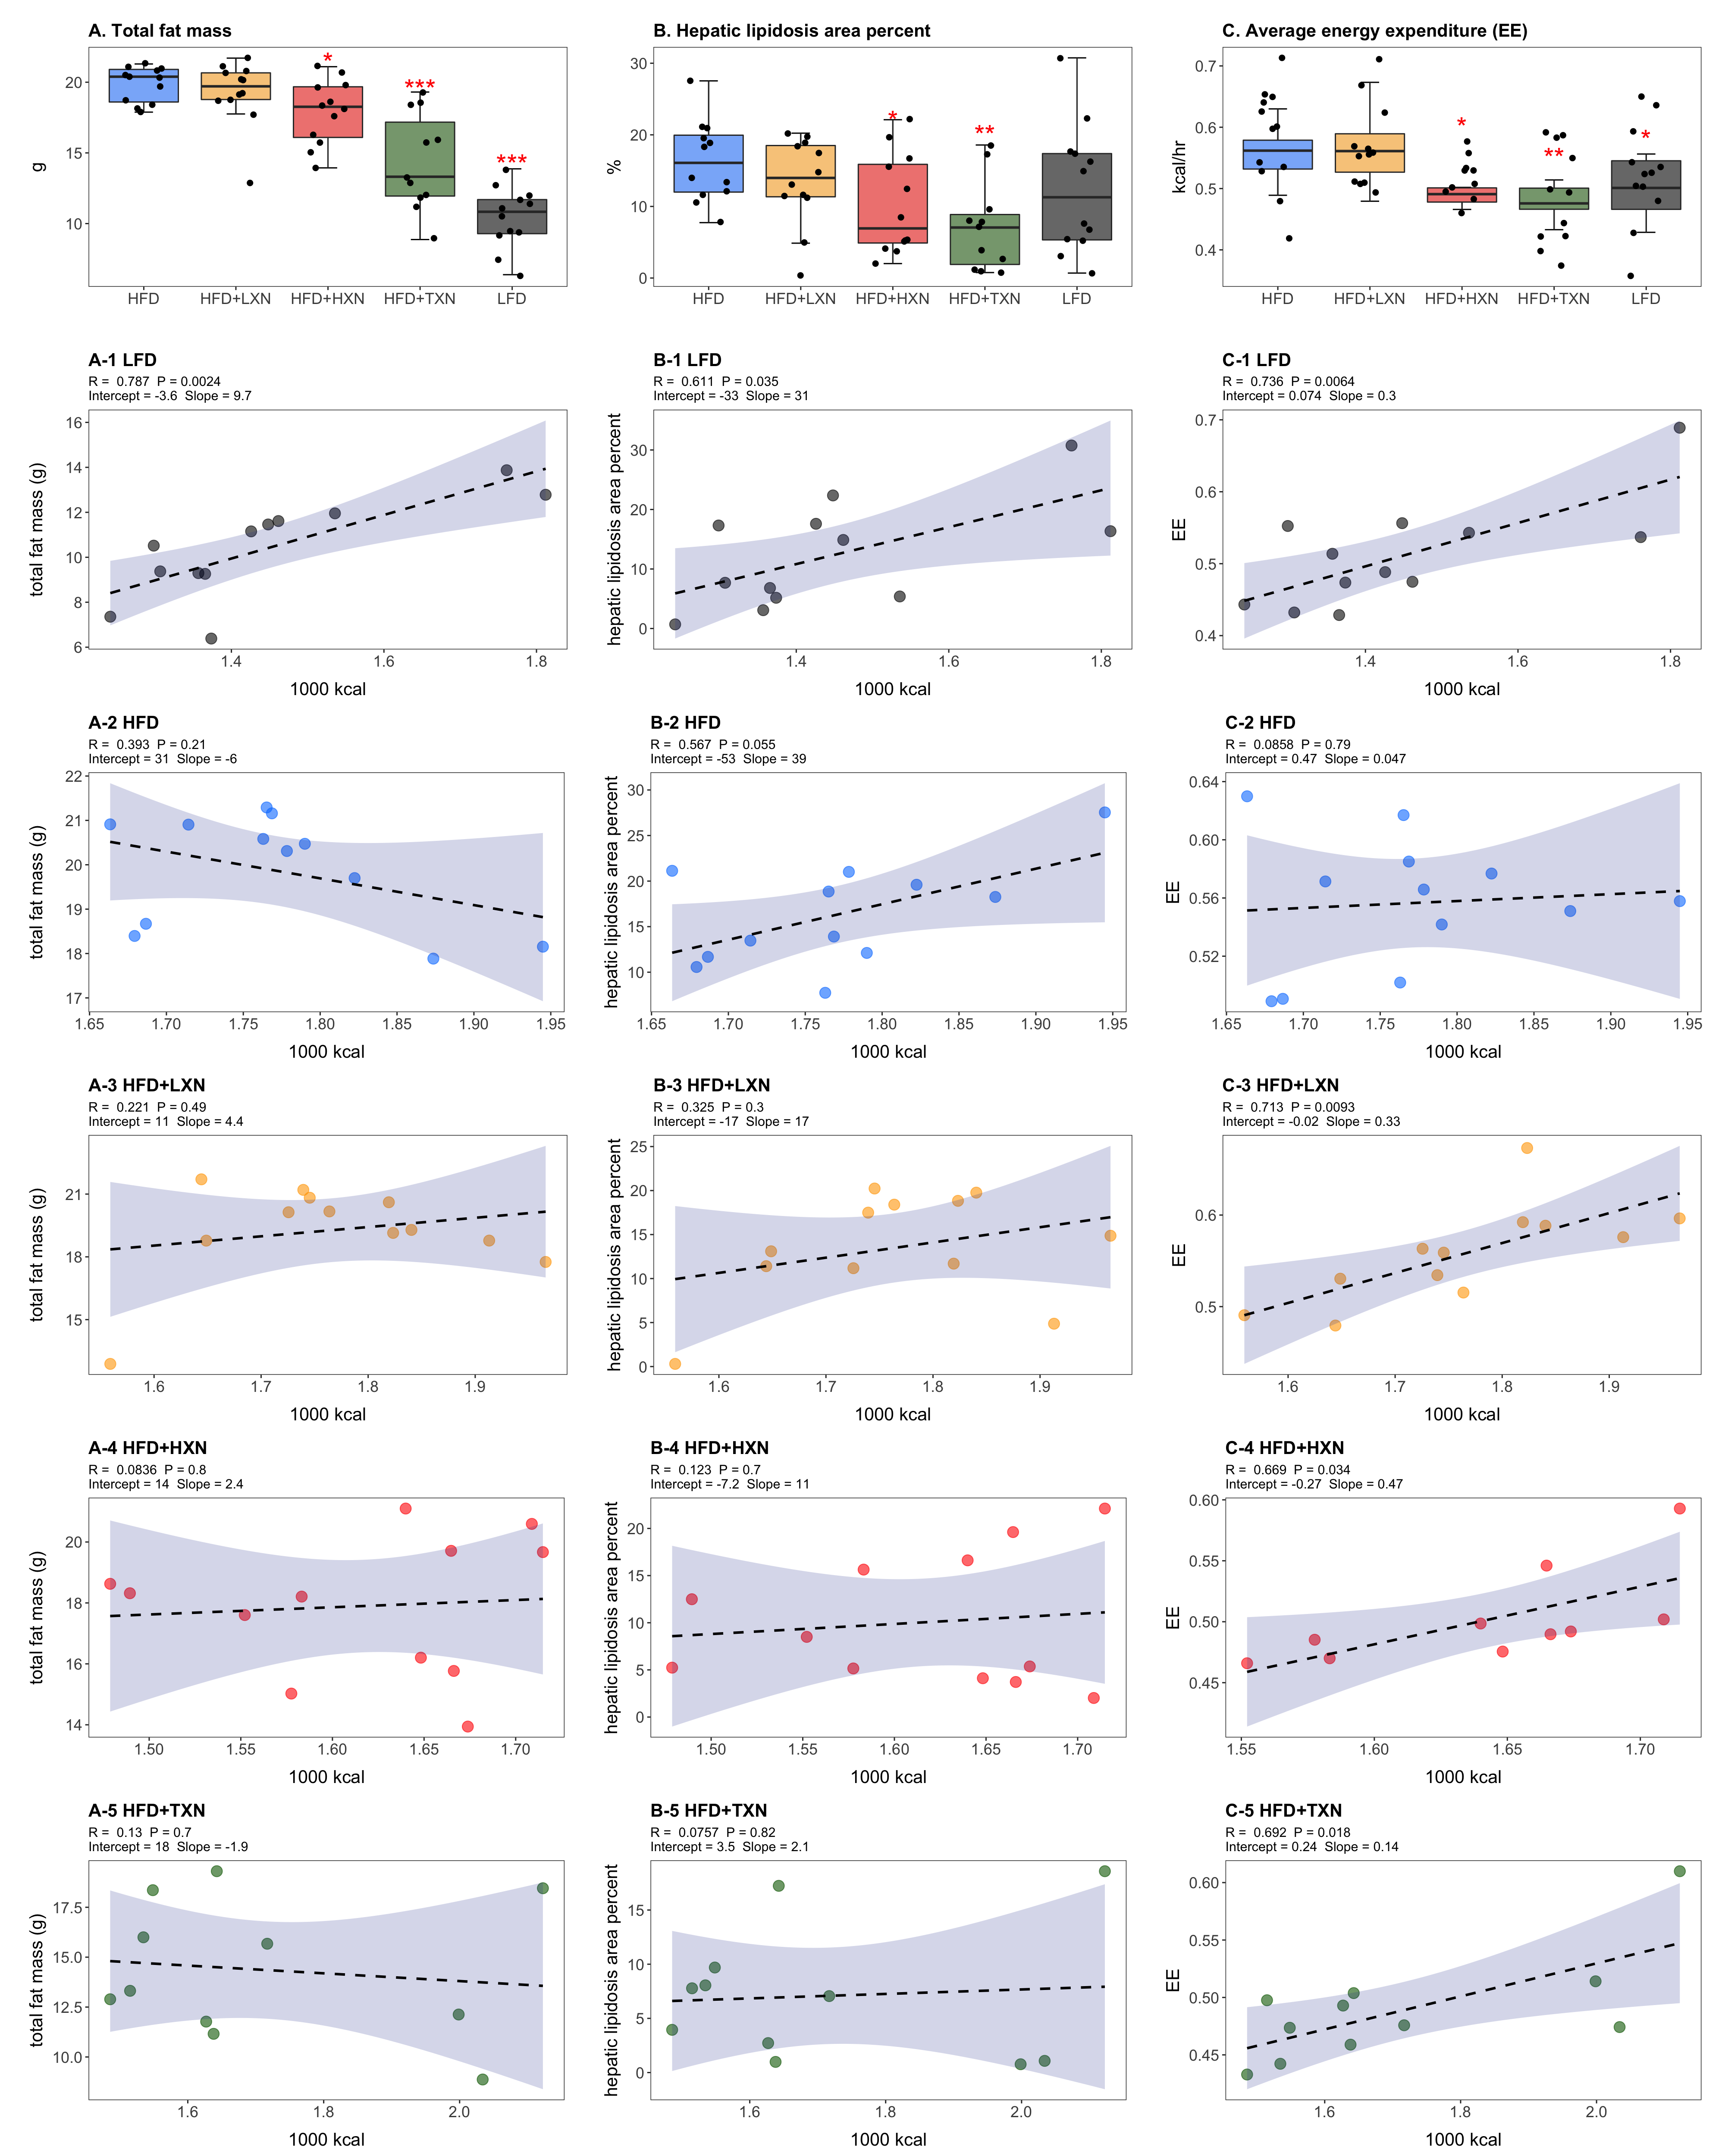

In [555]:
options(repr.plot.width = 20, repr.plot.height = 25, repr.plot.res = 200)
(figure2.2 <- wrap_plots(row1, row2, row3, row4, row5, row6, nrow=6))

In [540]:
#graph2pdf(figure2.2, "figure2-2.pdf", width = 20, height = 25)

# 5. individual fat mass and caloric intake

#### A. subq

In [556]:
A <- ggplot(data = data, aes(x = vars2, y = subq_wt, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="g",title="A. Sub Q") +
	theme_legend2()

label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       subq_wt = c(2.55, 1.75, 1))
A <- A + geom_text(data = label.df, label = c("**", "***", "***"), color='red', size = 8)

In [270]:
model <- lm(subq_wt ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD   -1.079 0.173 54 -6.224  <.0001 
 HXN vs HFD   -0.458 0.170 54 -2.697  0.0093 
 LFD vs HFD   -1.479 0.170 54 -8.720  <.0001 
 TXN vs LFD    0.400 0.173 54  2.305  0.0251 
 LXN vs HFD   -0.189 0.170 54 -1.115  0.2697 


#### B. epididymal

In [557]:
B <- ggplot(data = data, aes(x = vars2, y = epi_wat, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="g",title="B. Epididymal fat") +
	theme_legend2()

label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       epi_wat = c(3.55, 1.2, 2.22))
B <- B + geom_text(data = label.df, label = c("**", "0.06", "*"), color='red', size = 8)

In [283]:
model <- lm(epi_wat ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD   0.3798 0.200 54  1.903  0.0624 
 HXN vs HFD   0.5933 0.195 54  3.040  0.0036 
 LFD vs HFD  -0.4650 0.195 54 -2.382  0.0208 
 TXN vs LFD   0.8448 0.200 54  4.233  0.0001 
 LXN vs HFD   0.0725 0.195 54  0.371  0.7118 


#### C. mesenteric

In [558]:
C <- ggplot(data = data, aes(x = vars2, y = mesenteric_wt, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="g",title="C. Mesenteric fat") +
	theme_legend2()

label.df <- data.frame(vars2 = c("HFD+HXN", "HFD+TXN", "LFD"),
                       mesenteric_wt = c(1.83, 1.58, 0.66))
C <- C + geom_text(data = label.df, label = c("*", "***", "***"), color='red', size = 8)

In [295]:
model <- lm(mesenteric_wt ~ vars2, data = data)
leastsquare <- lsmeans(model, "vars2")
contrast(leastsquare, Contrasts, adjust = "none")

 contrast   estimate    SE df t.ratio p.value
 TXN vs HFD   -0.703 0.137 54 -5.126  <.0001 
 HXN vs HFD   -0.279 0.134 54 -2.082  0.0421 
 LFD vs HFD   -0.913 0.134 54 -6.810  <.0001 
 TXN vs LFD    0.210 0.137 54  1.534  0.1308 
 LXN vs HFD   -0.180 0.134 54 -1.342  0.1851 


In [559]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row1 <- (A | B | C) + plot_layout(nrow = 1, ncol=3)

In [560]:
lfd_subq_wt_cal <- ggplotRegression2(lm(subq_wt ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "subQ fat mass (g)")+ theme_legend2()
hfd_subq_wt_cal <- ggplotRegression2(lm(subq_wt ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "subQ fat mass (g)")+ theme_legend2()
lxn_subq_wt_cal <- ggplotRegression2(lm(subq_wt ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "subQ fat mass (g)")+ theme_legend2()
hxn_subq_wt_cal <- ggplotRegression2(lm(subq_wt ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "subQ fat mass (g)")+ theme_legend2()
txn_subq_wt_cal <- ggplotRegression2(lm(subq_wt ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "subQ fat mass (g)")+ theme_legend2()

In [561]:
lfd_epi_wat_cal <- ggplotRegression2(lm(epi_wat ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "Epididymal fat mass (g)")+ theme_legend2()
hfd_epi_wat_cal <- ggplotRegression2(lm(epi_wat ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "Epididymal fat mass (g)")+ theme_legend2()
lxn_epi_wat_cal <- ggplotRegression2(lm(epi_wat ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "Epididymal fat mass (g)")+ theme_legend2()
hxn_epi_wat_cal <- ggplotRegression2(lm(epi_wat ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "Epididymal fat mass (g)")+ theme_legend2()
txn_epi_wat_cal <- ggplotRegression2(lm(epi_wat ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "Epididymal fat mass (g)")+ theme_legend2()

In [562]:
lfd_mesenteric_wt_cal <- ggplotRegression2(lm(mesenteric_wt ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "Mesenteric fat mass (g)")+ theme_legend2()
hfd_mesenteric_wt_cal <- ggplotRegression2(lm(mesenteric_wt ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "Mesenteric fat mass (g)")+ theme_legend2()
lxn_mesenteric_wt_cal <- ggplotRegression2(lm(mesenteric_wt ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "Mesenteric fat mass (g)")+ theme_legend2()
hxn_mesenteric_wt_cal <- ggplotRegression2(lm(mesenteric_wt ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "Mesenteric fat mass (g)")+ theme_legend2()
txn_mesenteric_wt_cal <- ggplotRegression2(lm(mesenteric_wt ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "Mesenteric fat mass (g)")+ theme_legend2()

In [565]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row2 <- (lfd_subq_wt_cal | lfd_epi_wat_cal | lfd_mesenteric_wt_cal) + plot_layout(nrow = 1, ncol = 3)

In [566]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row3 <- (hfd_subq_wt_cal | hfd_epi_wat_cal | hfd_mesenteric_wt_cal) + plot_layout(nrow = 1, ncol = 3)

In [567]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row4 <- (lxn_subq_wt_cal | lxn_epi_wat_cal | lxn_mesenteric_wt_cal) + plot_layout(nrow = 1, ncol = 3)

In [568]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row5 <- (hxn_subq_wt_cal | hxn_epi_wat_cal | hxn_mesenteric_wt_cal) + plot_layout(nrow = 1, ncol = 3)

In [569]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
row6 <- (txn_subq_wt_cal | txn_epi_wat_cal | txn_mesenteric_wt_cal) + plot_layout(nrow = 1, ncol = 3)

#### Figure

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



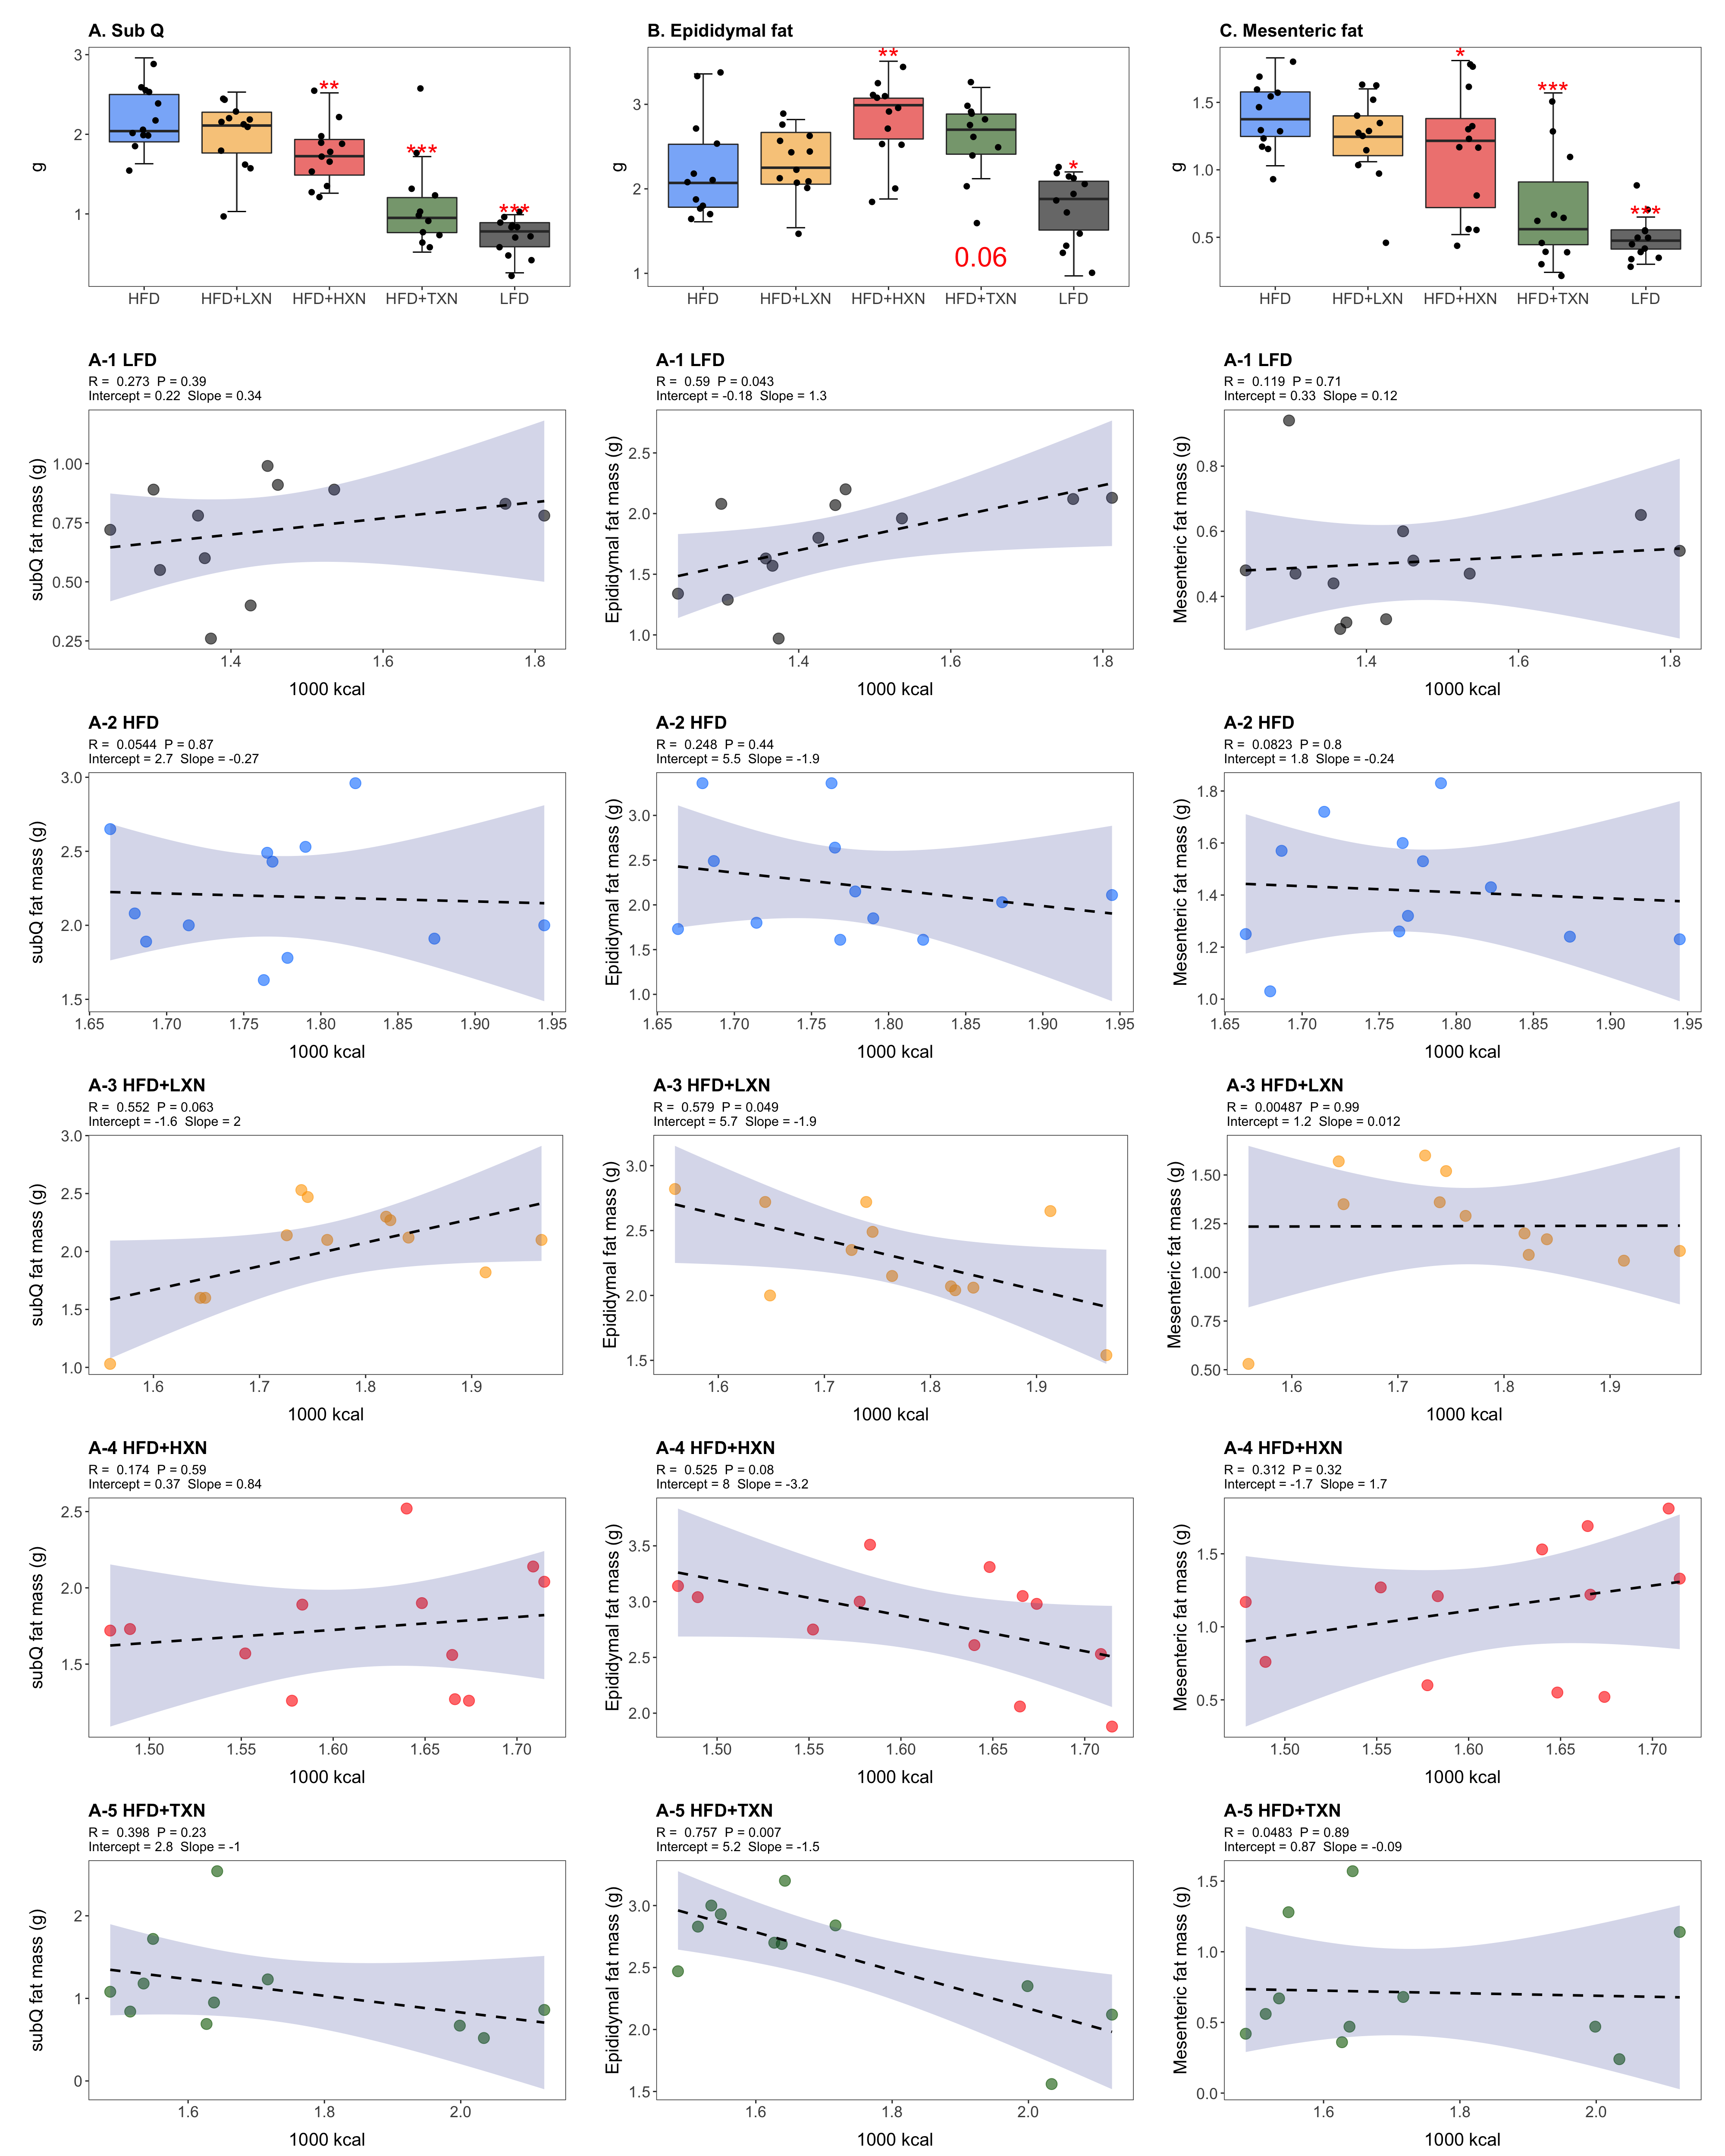

In [571]:
options(repr.plot.width = 20, repr.plot.height = 25, repr.plot.res = 200)
(figure3 <- wrap_plots(row1, row2, row3, row4, row5, row6, nrow=6))

In [570]:
#graph2pdf(figure3, "figure3.pdf", width = 20, height = 25)

# 6. fecal TAG and caloric intake

In [581]:
lfd_fecal_tot_tag_cal <- ggplotRegression2(lm(fecal_tot_tag ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
hfd_fecal_tot_tag_cal <- ggplotRegression2(lm(fecal_tot_tag ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
lxn_fecal_tot_tag_cal <- ggplotRegression2(lm(fecal_tot_tag ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
hxn_fecal_tot_tag_cal <- ggplotRegression2(lm(fecal_tot_tag ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
txn_fecal_tot_tag_cal <- ggplotRegression2(lm(fecal_tot_tag ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()

In [584]:
lfd_CHL_feces2_cal <- ggplotRegression2(lm(CHL_feces2 ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
hfd_CHL_feces2_cal <- ggplotRegression2(lm(CHL_feces2 ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
lxn_CHL_feces2_cal <- ggplotRegression2(lm(CHL_feces2 ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
hxn_CHL_feces2_cal <- ggplotRegression2(lm(CHL_feces2 ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()
txn_CHL_feces2_cal <- ggplotRegression2(lm(CHL_feces2 ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "fecal tag (mg)")+ theme_legend2()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



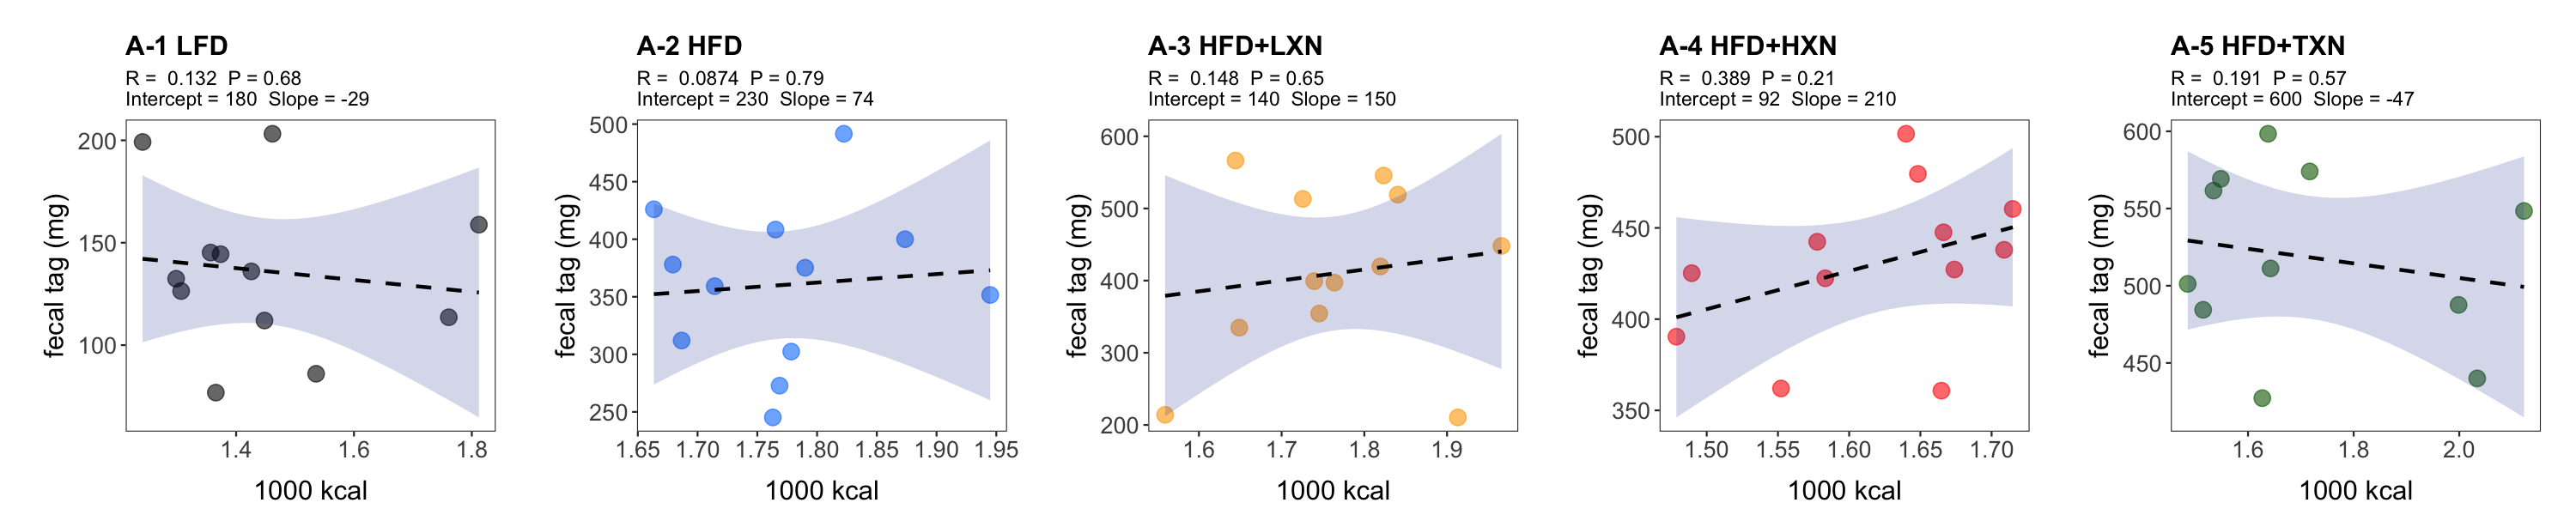

In [585]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
(fecalCL <- (lfd_CHL_feces2_cal | hfd_CHL_feces2_cal | lxn_CHL_feces2_cal | hxn_CHL_feces2_cal| txn_CHL_feces2_cal) + plot_layout(nrow = 1, ncol = 5))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



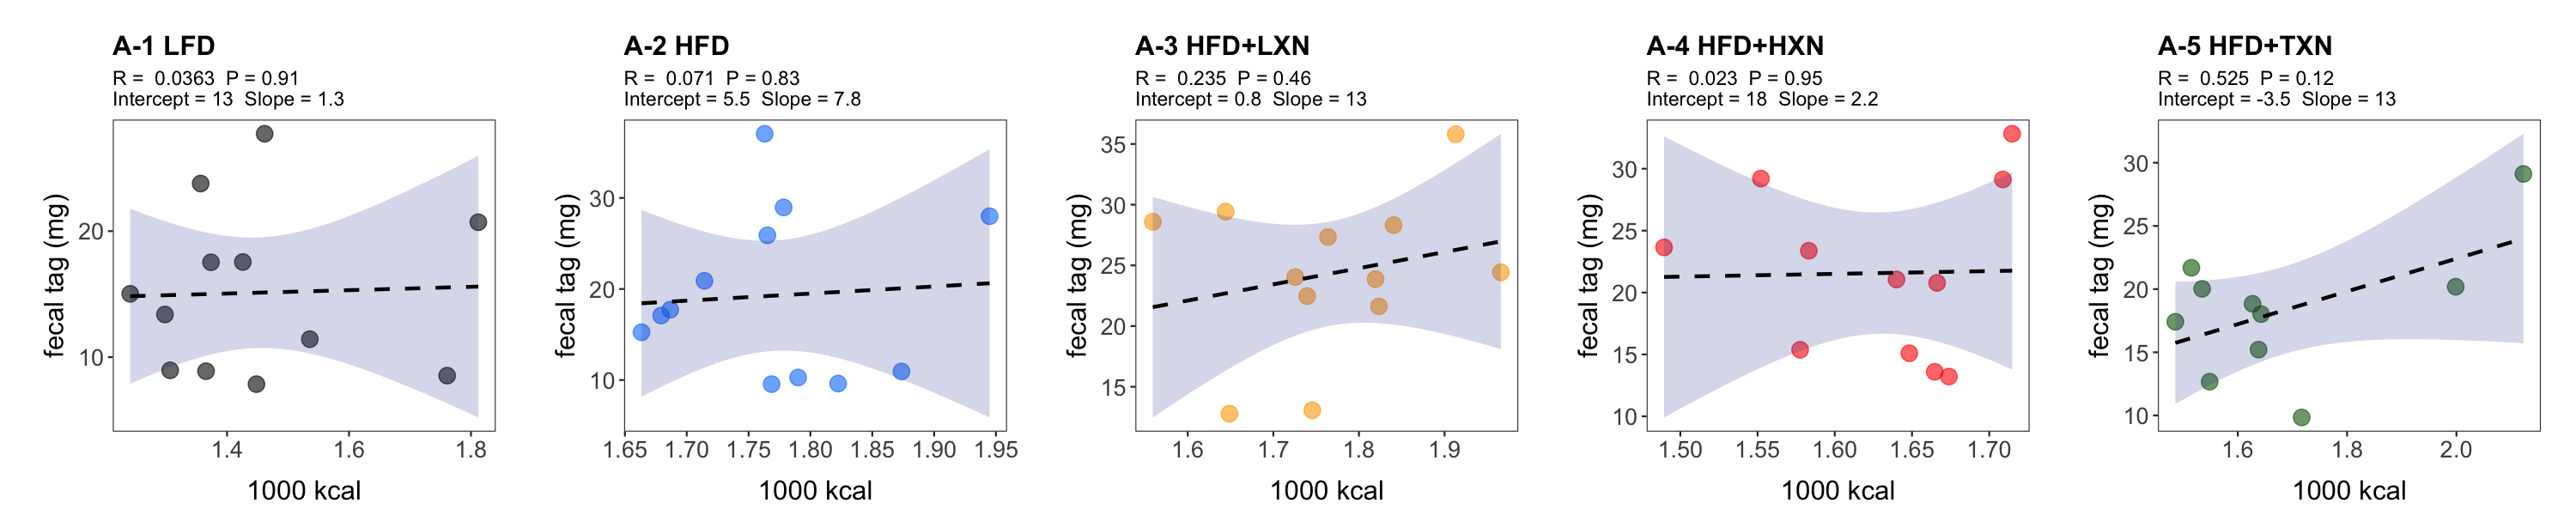

In [582]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
(fecalTag <- (lfd_fecal_tot_tag_cal | hfd_fecal_tot_tag_cal | lxn_fecal_tot_tag_cal | hxn_fecal_tot_tag_cal| txn_fecal_tot_tag_cal) + plot_layout(nrow = 1, ncol = 5))

In [572]:
#graph2pdf(fecalTag, "fecalTag.pdf", width = 20, height = 4)

# 7. Plasma TAG and caloric intake

In [575]:
lfd_plasma_TAG_cal <- ggplotRegression2(lm(plasma_TAG ~ kkcal, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "1000 kcal", y = "plasma_TAG (mg/dL)")+ theme_legend2()
hfd_plasma_TAG_cal <- ggplotRegression2(lm(plasma_TAG ~ kkcal, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "1000 kcal", y = "plasma_TAG (mg/dL)")+ theme_legend2()
lxn_plasma_TAG_cal <- ggplotRegression2(lm(plasma_TAG ~ kkcal, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "1000 kcal", y = "plasma_TAG (mg/dL)")+ theme_legend2()
hxn_plasma_TAG_cal <- ggplotRegression2(lm(plasma_TAG ~ kkcal, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "1000 kcal", y = "plasma_TAG (mg/dL)")+ theme_legend2()
txn_plasma_TAG_cal <- ggplotRegression2(lm(plasma_TAG ~ kkcal, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "1000 kcal", y = "plasma_TAG (mg/dL)")+ theme_legend2()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



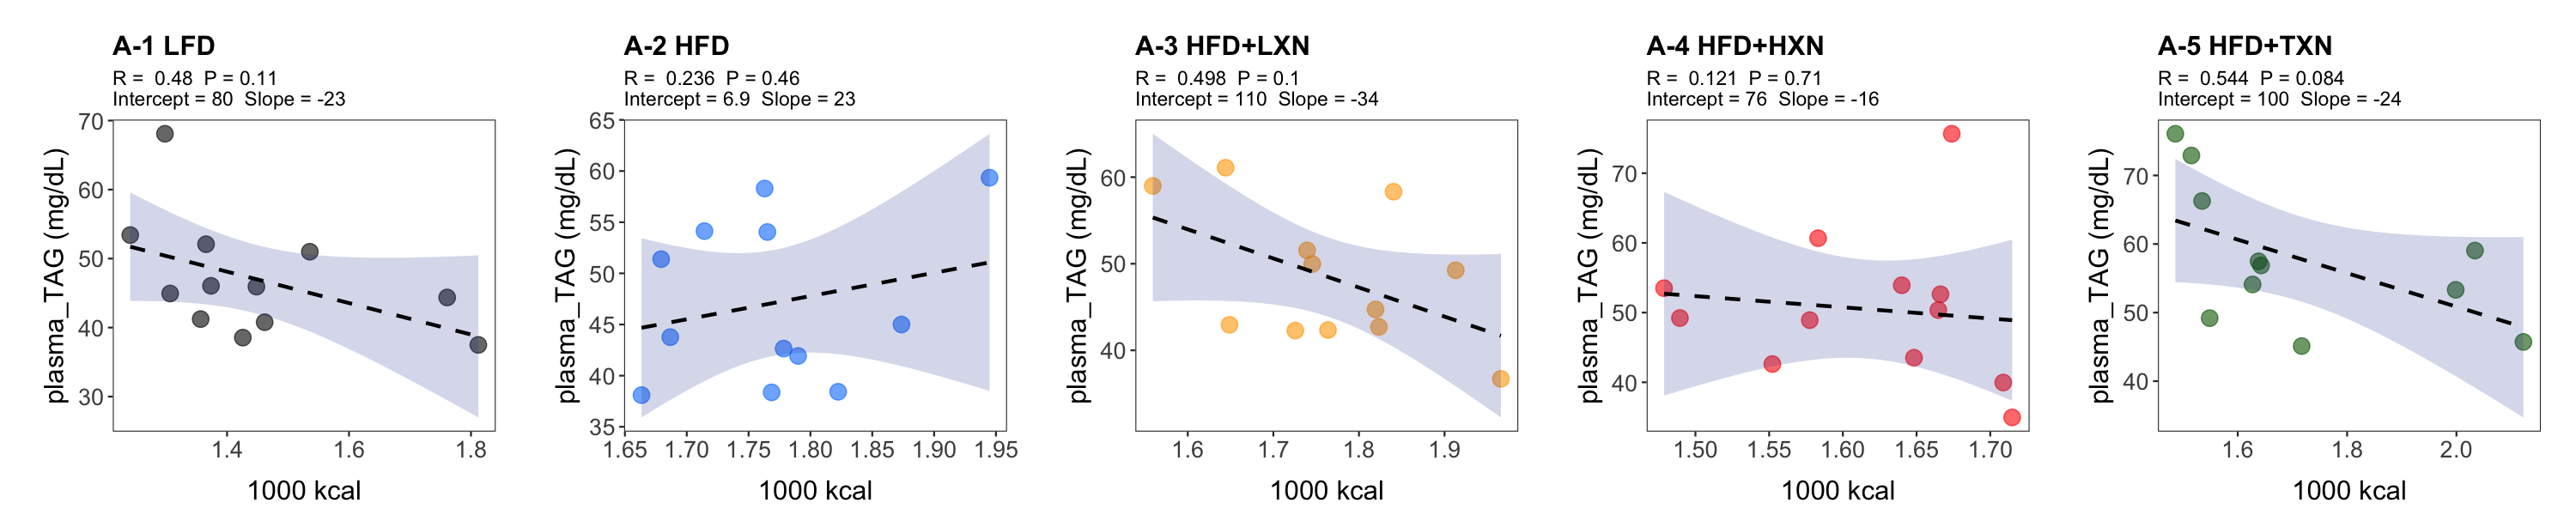

In [576]:
(platag <- (lfd_plasma_TAG_cal | hfd_plasma_TAG_cal | lxn_plasma_TAG_cal | hxn_plasma_TAG_cal| txn_plasma_TAG_cal) + plot_layout(nrow = 1, ncol = 5))
#graph2pdf(platag, "platag.pdf", width = 20, height = 4)

In [595]:
names(data)

[1] "ID"                 "Treatment"          "Cal_cum"           
 [4] "LV_TAG"             "lipidosis_area_pct" "Fat_mass"          
 [7] "subq_wt"            "epi_wat"            "mesenteric_wt"     
[10] "plasma_TAG"         "liver_wt"           "TG_feces"          
[13] "TG_feces2"          "fecal_tot_output"   "wt"                
[16] "Lean_mass"          "avgEE"              "avgEE2"            
[19] "leptin_new"         "glucose_plasma"     "insulin_plasma"    
[22] "CHL_feces2"         "uptake_freq_light"  "uptake_freq_dark"  
[25] "allmeters_light"    "allmeters_dark"     "pedmeters_light"   
[28] "pedmeters_dark"     "vars"               "vars2"             
[31] "lv_tot_tag"         "EE_norm"            "fecal_tot_tag"     
[34] "kkcal"              "allMeters"          "allPeds"           
[37] "rest_fat"

In [596]:
lfd_EE_allMeters <- ggplotRegression2(lm(avgEE ~ allMeters, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "allmeters", y = "avgEE")+ theme_legend2()
hfd_EE_allMeters <- ggplotRegression2(lm(avgEE ~ allMeters, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "allmeters", y = "avgEE")+ theme_legend2()
lxn_EE_allMeters <- ggplotRegression2(lm(avgEE ~ allMeters, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "allmeters", y = "avgEE")+ theme_legend2()
hxn_EE_allMeters <- ggplotRegression2(lm(avgEE ~ allMeters, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "allmeters", y = "avgEE")+ theme_legend2()
txn_EE_allMeters <- ggplotRegression2(lm(avgEE ~ allMeters, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "allmeters", y = "avgEE")+ theme_legend2()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



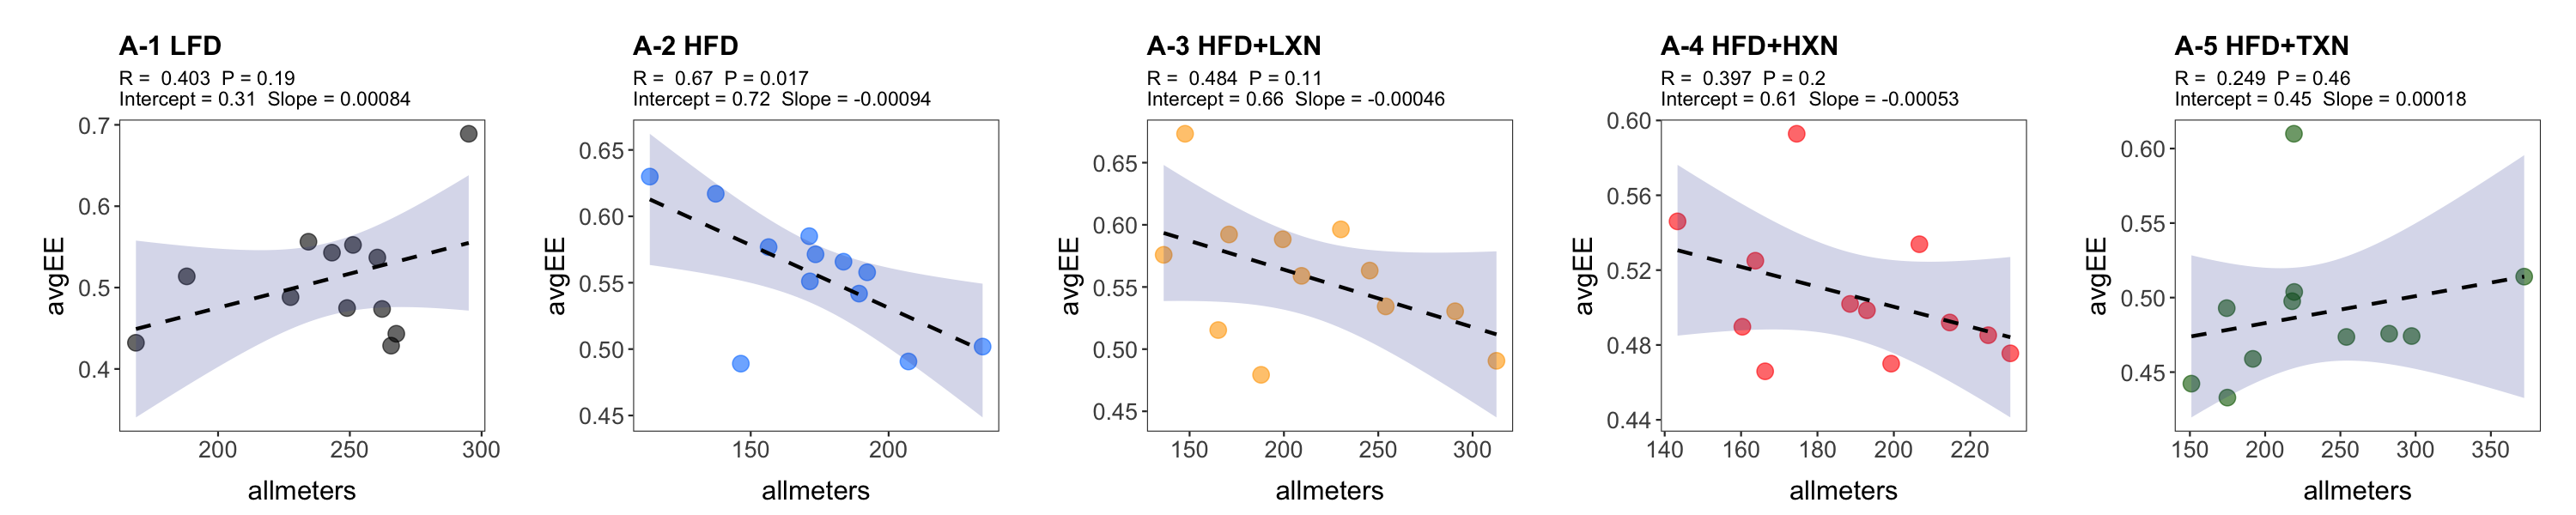

In [598]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
(EE_allMeters <- (lfd_EE_allMeters | hfd_EE_allMeters | lxn_EE_allMeters | hxn_EE_allMeters| txn_EE_allMeters) + plot_layout(nrow = 1, ncol = 5))

In [611]:
lfd_EE_allPeds <- ggplotRegression2(lm(avgEE ~ allPeds, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "Daily directed \nambulatory locomotion (m)", y = "avgEE")+ theme_legend2()
hfd_EE_allPeds <- ggplotRegression2(lm(avgEE ~ allPeds, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "Daily directed \nambulatory locomotion (m)", y = "avgEE")+ theme_legend2()
lxn_EE_allPeds <- ggplotRegression2(lm(avgEE ~ allPeds, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "Daily directed \nambulatory locomotion (m)", y = "avgEE")+ theme_legend2()
hxn_EE_allPeds <- ggplotRegression2(lm(avgEE ~ allPeds, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "Daily directed \nambulatory locomotion (m)", y = "avgEE")+ theme_legend2()
txn_EE_allPeds <- ggplotRegression2(lm(avgEE ~ allPeds, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "Daily directed \nambulatory locomotion (m)", y = "avgEE")+ theme_legend2()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



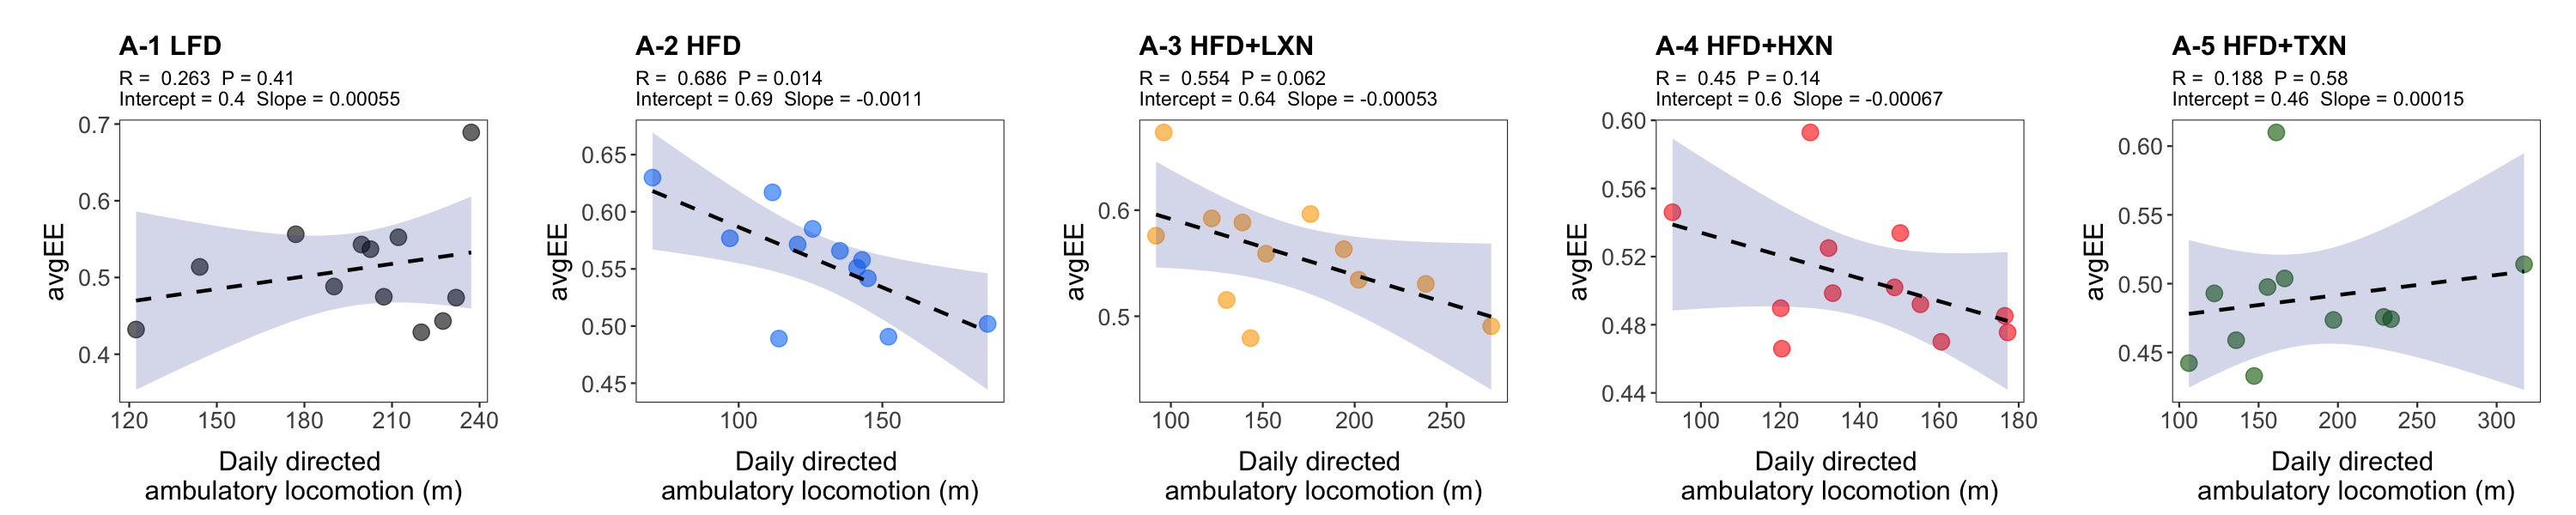

In [612]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
(EE_allPeds <- (lfd_EE_allPeds | hfd_EE_allPeds | lxn_EE_allPeds | hxn_EE_allPeds| txn_EE_allPeds) + plot_layout(nrow = 1, ncol = 5))

In [609]:
lfd_uptake_f_allPeds <- ggplotRegression2(lm(allPeds ~ uptake_f, data = lfd), "black") + 
                        labs(title = "A-1 LFD", x = "daily food uptake frequences", y = "Daily directed \nambulatory locomotion (m)")+ theme_legend2()
hfd_uptake_f_allPeds <- ggplotRegression2(lm(allPeds ~ uptake_f, data = hfd), "#0080ff")+ 
                        labs(title = "A-2 HFD", x = "daily food uptake frequences", y = "Daily directed \nambulatory locomotion (m)")+ theme_legend2()
lxn_uptake_f_allPeds <- ggplotRegression2(lm(allPeds ~ uptake_f, data = lxn), "#ffa500")+ 
                        labs(title = "A-3 HFD+LXN", x = "daily food uptake frequences", y = "Daily directed \nambulatory locomotion (m)")+ theme_legend2()
hxn_uptake_f_allPeds <- ggplotRegression2(lm(allPeds ~ uptake_f, data = hxn), "red")+ ggtitle("HXN")+ 
                        labs(title = "A-4 HFD+HXN", x = "daily food uptake frequences", y = "Daily directed \nambulatory locomotion (m)")+ theme_legend2()
txn_uptake_f_allPeds <- ggplotRegression2(lm(allPeds ~ uptake_f, data = txn), "darkgreen")+ 
                        labs(title = "A-5 HFD+TXN", x = "daily food uptake frequences", y = "Daily directed \nambulatory locomotion (m)")+ theme_legend2()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



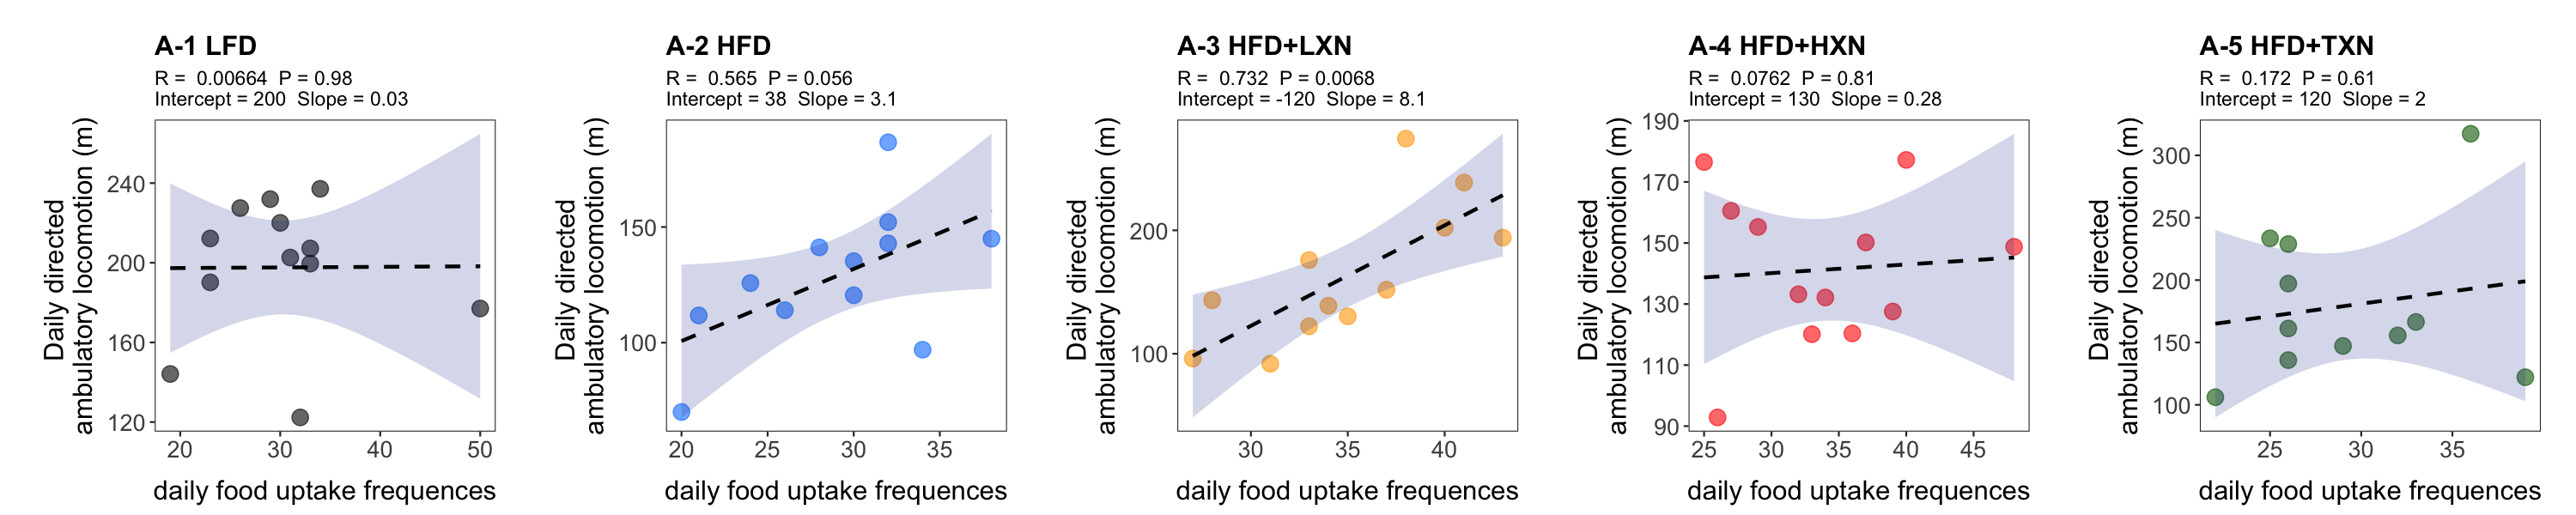

In [610]:
options(repr.plot.width = 20, repr.plot.height = 4, repr.plot.res = 150)
(food_allPeds <- (lfd_uptake_f_allPeds | hfd_uptake_f_allPeds | lxn_uptake_f_allPeds | hxn_uptake_f_allPeds| txn_uptake_f_allPeds) + plot_layout(nrow = 1, ncol = 5))

# EE & Cal

In [361]:
options(repr.plot.width = 14, repr.plot.height = 4, repr.plot.res = 150)
##########################################################################################

lfd_EE_cal <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = lfd), "black") + 
                labs(title = "C. Average EE and Caloric Intake", x = "", y = "Average energy expenditure")+ theme_legend2()
hfd_EE_cal <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = hfd), "#0080ff")+ 
                labs(title = "", x = "", y = "")+ theme_legend2()
txn_EE_cal <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = txn), "darkgreen")+ 
                labs(title = "", x = "", y = "")+ theme_legend2()

##########################################################################################
parB <- (lfd_EE_cal | hfd_EE_cal | txn_EE_cal)

parB[[2]] = parB[[2]] + theme(axis.text.y = element_blank(),
                                        axis.ticks.y = element_blank(),
                                        axis.title.y = element_blank())

parB[[3]] = parB[[3]] + theme(axis.text.y = element_blank(),
                                        axis.ticks.y = element_blank(),
                                        axis.title.y = element_blank())
#lxn_EE_cal <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = lxn), "yellow")+ ggtitle("LXN")+ theme_legend2()
#hxn_EE_cal <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = hxn), "red")+ ggtitle("HXN")+ theme_legend2()

#### Fig

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



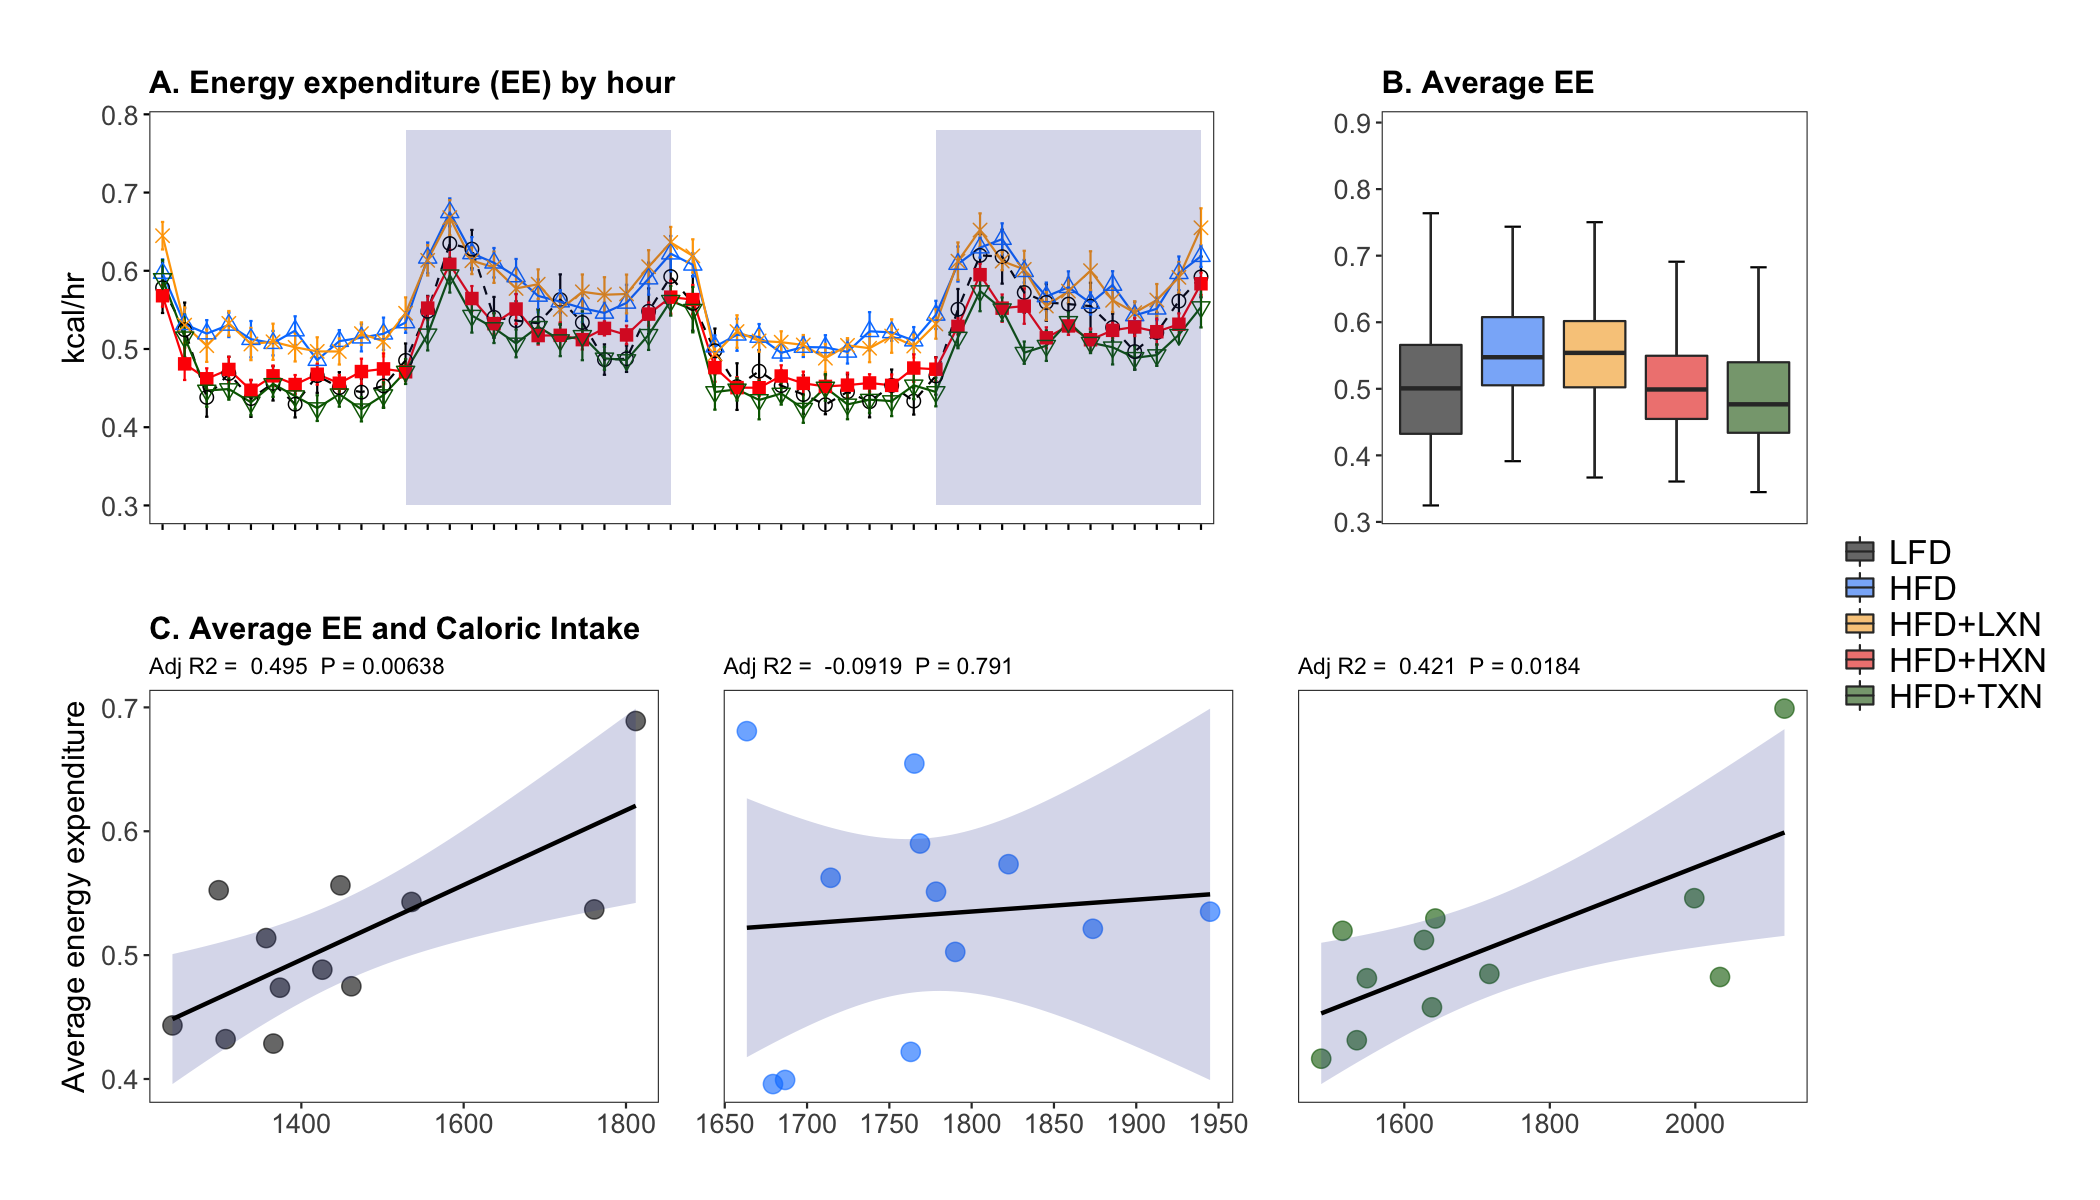

In [362]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 150)
(ee_cal <- parA / parB)+ plot_layout(heights = c(1,1), guides = 'collect')

In [22]:
#graph2pdf(EE, "EE.pdf", width = 16, height = 8)

#  Fat mass & Cal

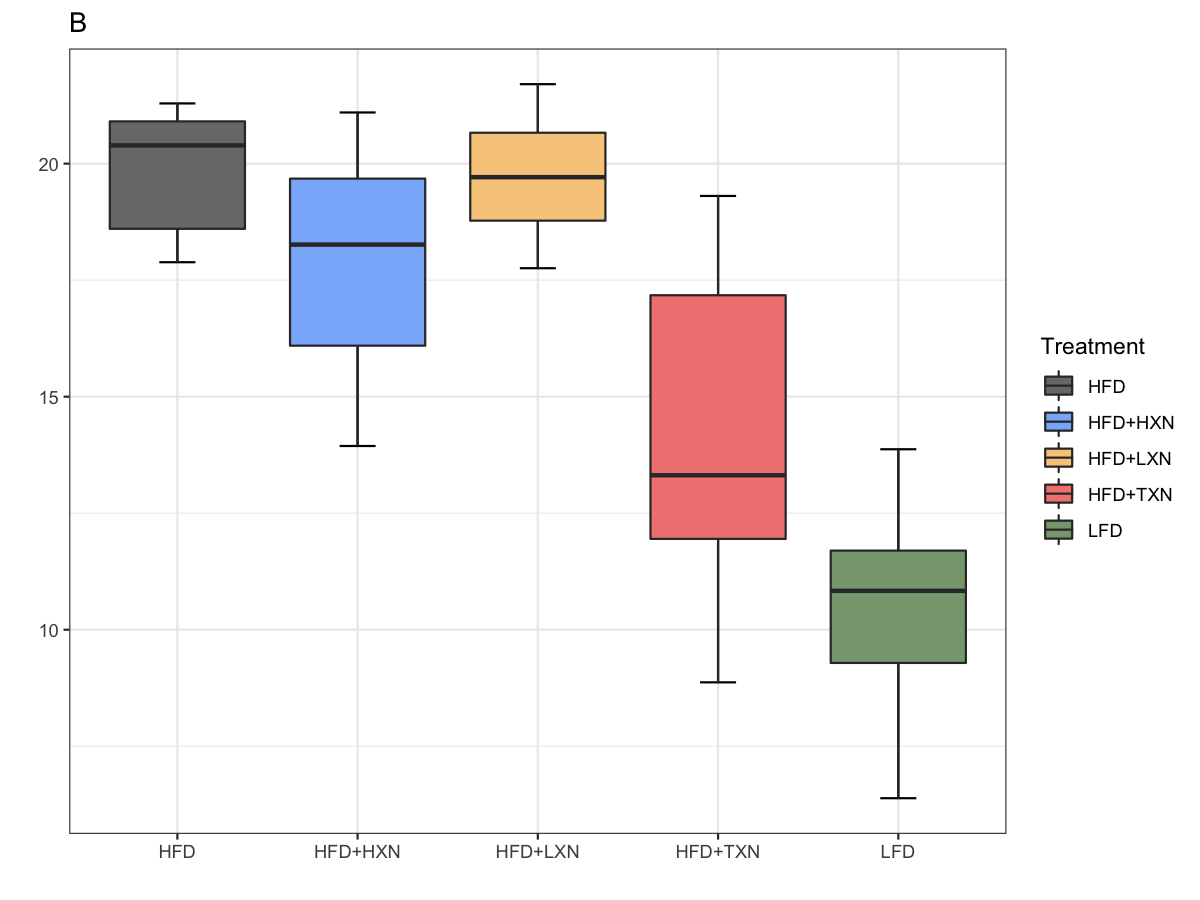

In [316]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)
ggplot(data = data, aes(x = Treatment, y = Fat_mass, fill = Treatment)) +
    stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
    geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor2) +
    #geom_jitter(shape = 4, size = 3, width = 0.2, height = 0.1) +
    labs(x = '', y = '', title = "B")




In [604]:
names(data)

[1] "ID"                 "Treatment"          "Cal_cum"           
 [4] "LV_TAG"             "lipidosis_area_pct" "Fat_mass"          
 [7] "subq_wt"            "epi_wat"            "mesenteric_wt"     
[10] "plasma_TAG"         "liver_wt"           "TG_feces"          
[13] "TG_feces2"          "fecal_tot_output"   "wt"                
[16] "Lean_mass"          "avgEE"              "avgEE2"            
[19] "leptin_new"         "glucose_plasma"     "insulin_plasma"    
[22] "CHL_feces2"         "uptake_freq_light"  "uptake_freq_dark"  
[25] "allmeters_light"    "allmeters_dark"     "pedmeters_light"   
[28] "pedmeters_dark"     "vars"               "vars2"             
[31] "lv_tot_tag"         "EE_norm"            "fecal_tot_tag"     
[34] "kkcal"              "uptake_f"           "allMeters"         
[37] "allPeds"            "rest_fat"

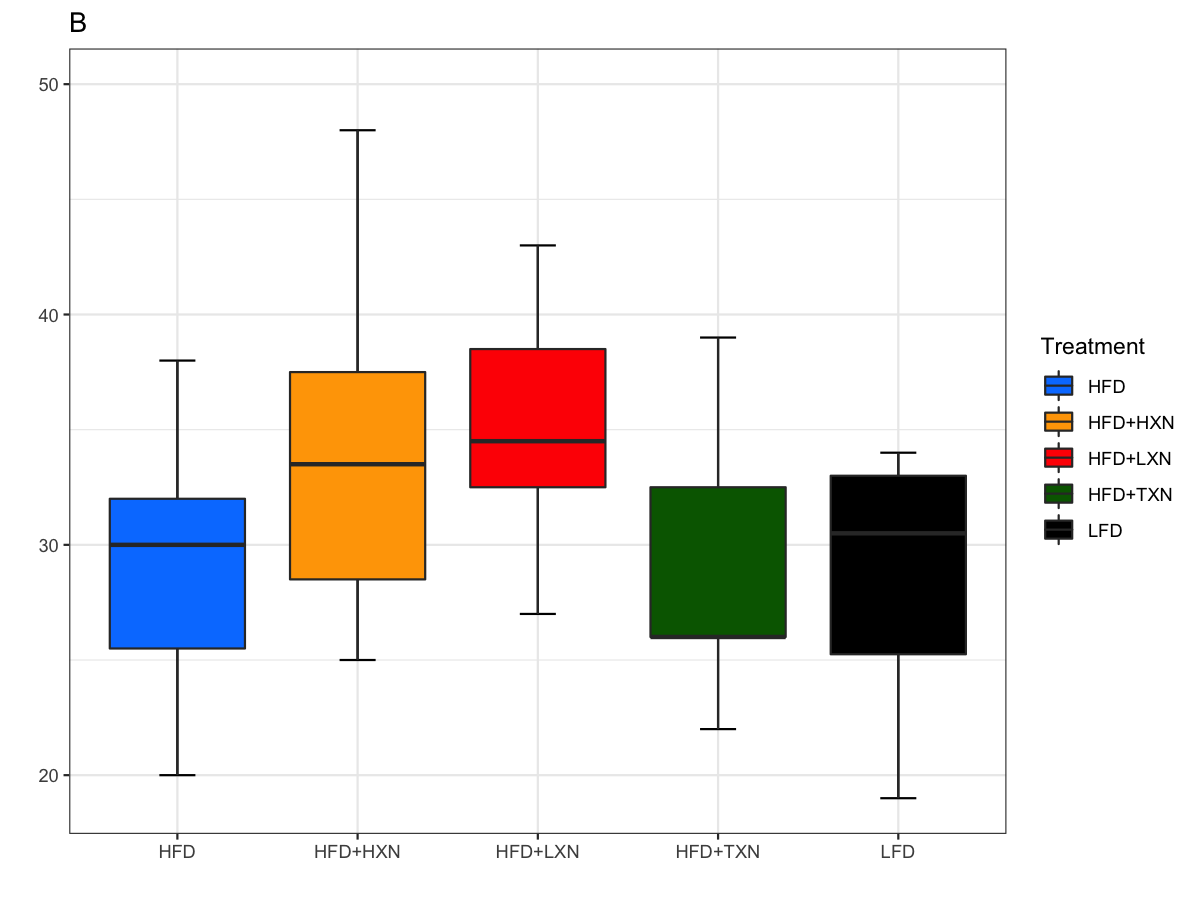

In [606]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)
ggplot(data = data, aes(x = Treatment, y = uptake_f, fill = Treatment)) +
    stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
    geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor) +
    #geom_jitter(shape = 4, size = 3, width = 0.2, height = 0.1) +
    labs(x = '', y = '', title = "B")

In [363]:
options(repr.plot.width = 14, repr.plot.height = 4, repr.plot.res = 150)
##########################################################################################

lfd_fat_cal <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = lfd), "black") + 
                labs(title = "D. Fat mass and caloric intake", x = "", y = "Fat mass (g)")+ theme_legend2()
hfd_fat_cal <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = hfd), "#0080ff")+ 
                labs(title = "", x = "", y = "")+ theme_legend2()
txn_fat_cal <- ggplotRegression2(lm(Fat_mass ~ Cal_cum, data = txn), "darkgreen")+ 
                labs(title = "", x = "", y = "")+ theme_legend2()

##########################################################################################
fat <- (lfd_fat_cal | hfd_fat_cal | txn_fat_cal)

In [364]:
options(repr.plot.width = 14, repr.plot.height = 4, repr.plot.res = 150)
##########################################################################################

lfd_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = lfd), "black") + 
                labs(title = "E. Steatosis and caloric intake", x = "LFD", y = "Lipidosis Area Percent (%)")+ theme_legend2()
hfd_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = hfd), "#0080ff")+ 
                labs(title = "", x = "Cumulative Caloric Consumption", y = "")+ theme_legend2()
txn_lipidosis_area_pct_cal <- ggplotRegression2(lm(lipidosis_area_pct ~ Cal_cum, data = txn), "darkgreen")+ 
                labs(title = "", x = "HFD+TXN", y = "")+ theme_legend2()

##########################################################################################
lipid <- (lfd_lipidosis_area_pct_cal | hfd_lipidosis_area_pct_cal | txn_lipidosis_area_pct_cal)

In [367]:
options(repr.plot.width = 13, repr.plot.height = 12, repr.plot.res = 150)
figure <- (ee_cal / fat / lipid)+ plot_layout(nrow = 4, heights = c(1.5,1,1,1), guides = 'collect')

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



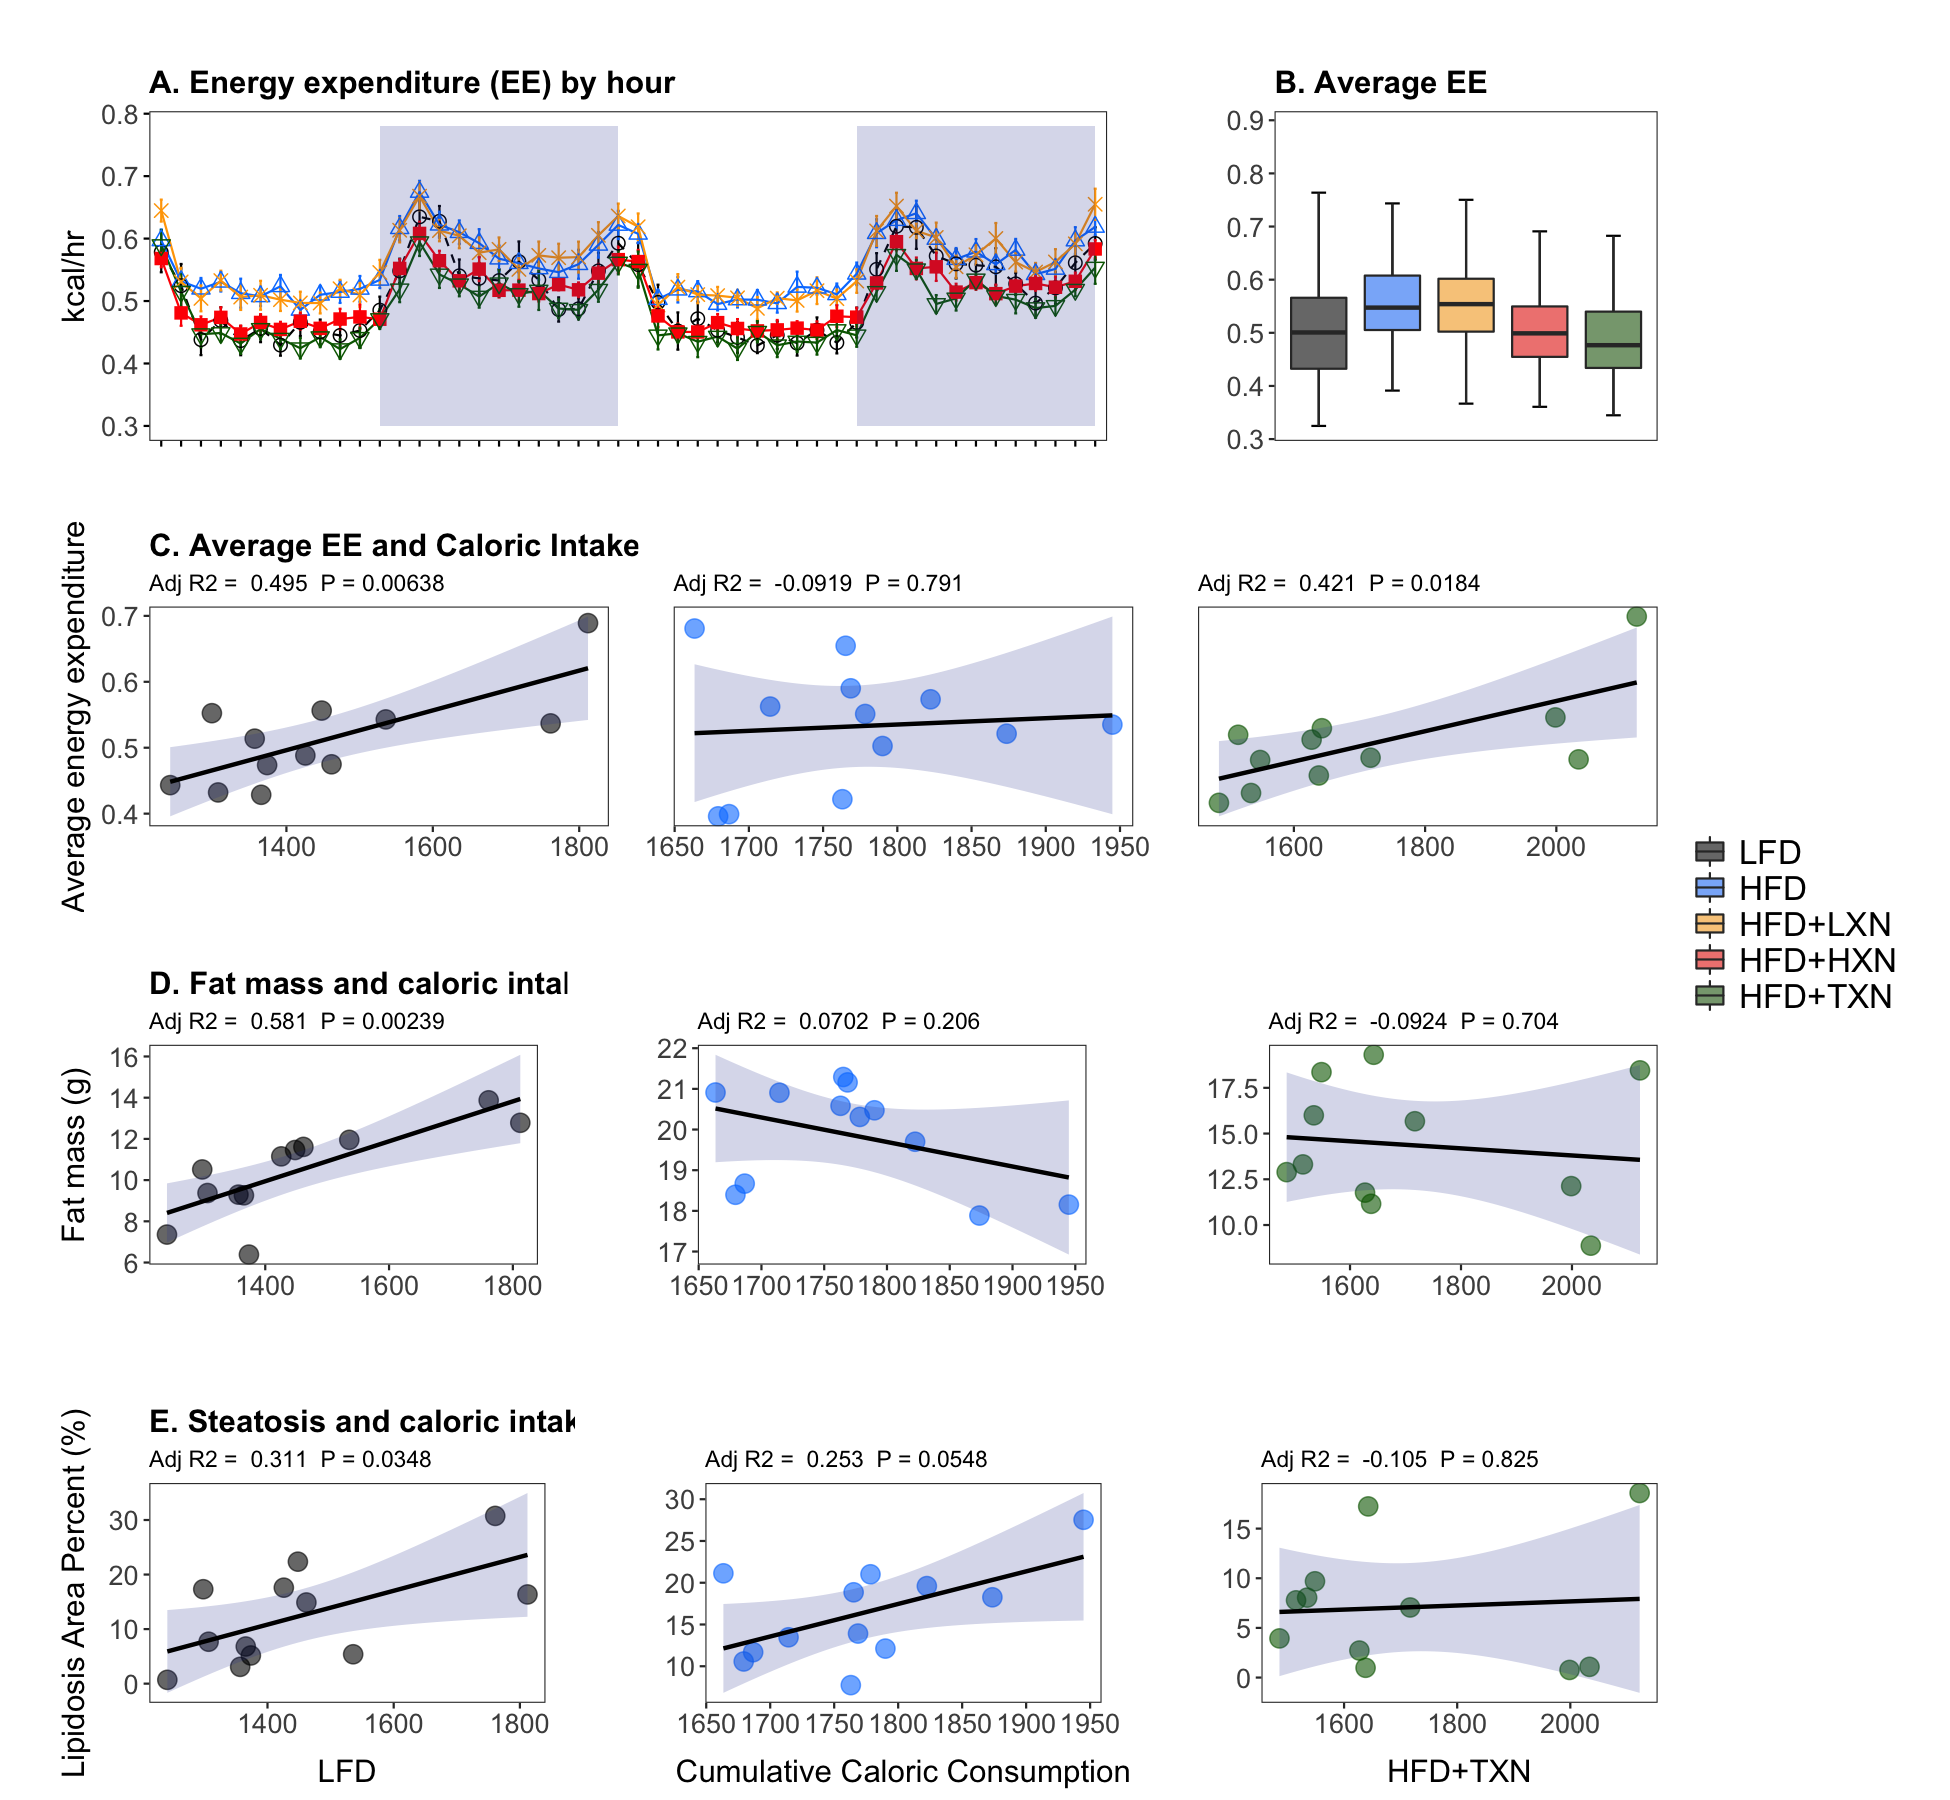

In [368]:
figure

In [352]:
graph2pdf(figure, "figure.pdf", width = 15, height = 13)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Exported graph as figure.pdf



In [373]:
f <- function(x){
  r <- quantile(x, probs = c(0.10, 0.25, 0.5, 0.75, 0.90))
  names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
  r
}

o <- function(x){
  subset(x, x < quantile(x, probs = 0.1) | quantile(x, probs = 0.9) < x)
}

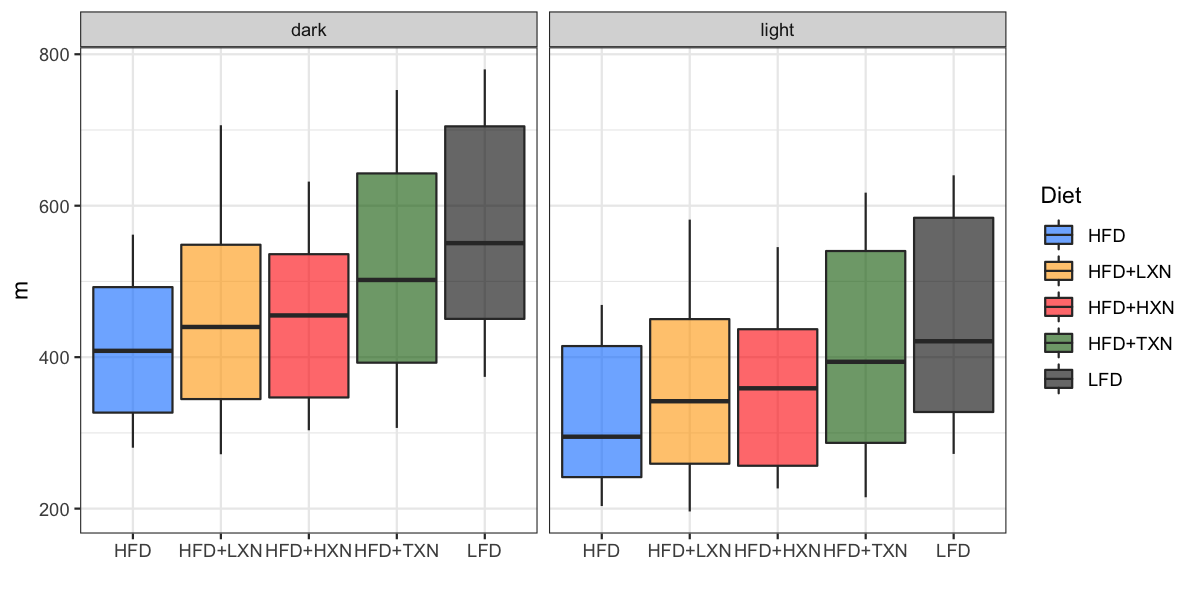

In [376]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 150)
ggplot(data=meterbox, aes(x=Diet, y=AllMeters, fill=Diet)) +
    stat_summary(fun.data = f, geom = "boxplot", position = "dodge") +
    #stat_summary(fun.y = o, geom = "point") +
    scale_fill_manual(values = alpha(mycolor, .6)) +
    xlab("") + ylab("m") +
    facet_grid(~ Cycle)

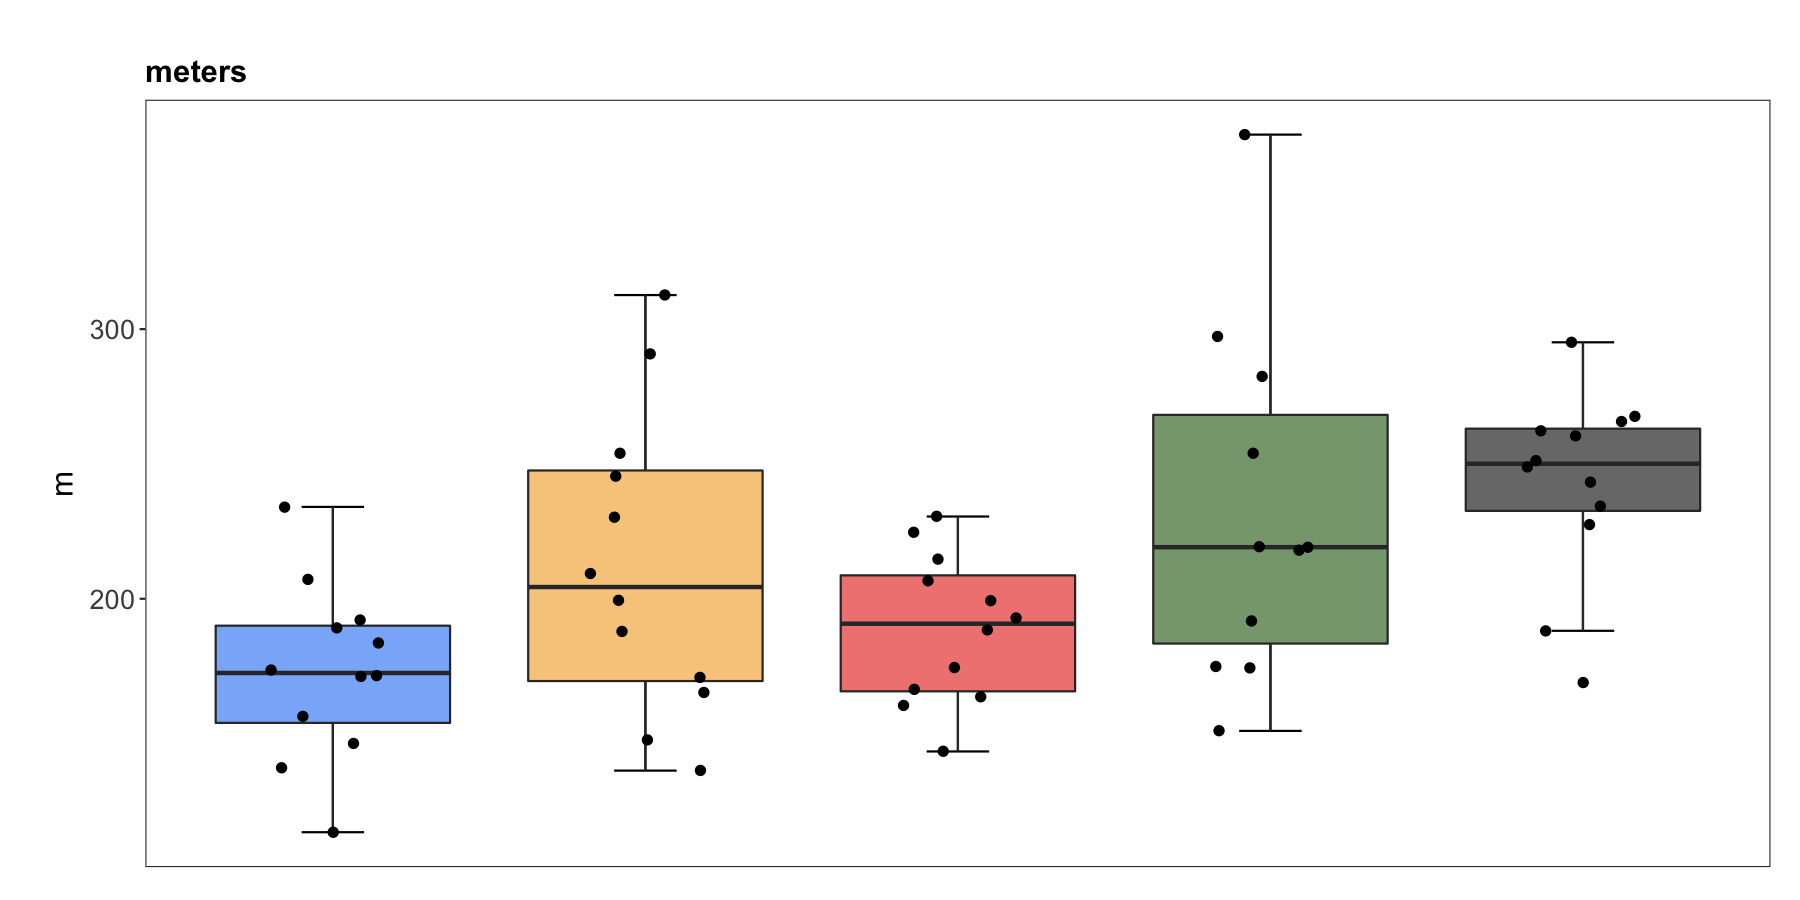

In [593]:
ggplot(data = data, aes(x = vars2, y = allmeters_dark+allmeters_light, fill = vars2)) +
	stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
	geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor_alpha) +
	geom_jitter(shape = 20, size = 3, width = 0.2, height = 0.1) +
    labs(x="",y="m",title="meters") +
	theme_legend_free()

# Stats

## Average energy expenditure

In [51]:
model_lt <- lm(medEE ~ Diet, data=median_EE_lt)
leastsquare <- lsmeans(model_lt, "Diet")
output <- contrast(leastsquare, Contrasts, adjust = "none")
print(output)

 contrast   estimate     SE df t.ratio p.value
 TXN vs HFD -0.07218 0.0212 54 -3.412  0.0012 
 HXN vs HFD -0.04972 0.0207 54 -2.403  0.0197 
 LFD vs HFD -0.05824 0.0207 54 -2.815  0.0068 
 TXN vs LFD -0.01393 0.0212 54 -0.659  0.5129 
 LXN vs HFD -0.00111 0.0207 54 -0.053  0.9575 



In [371]:
meterbox <- profile %>% group_by(Diet, Cycle)

## Correlations

> 4.1 shows that LFD, HXN and TXN had lower average energy expenditure compared to HFD mice. This makes intuitive sense because usually the larger the animal, the more energy is spent. I did a correlation analysis with total body weight just to see what it looks like. And I excluded LFD from this analysis.

In [74]:
dataHFD <- data %>%
filter(Treatment != "LFD")

In [75]:
dataHFD %>%
    summarise(r = pearson.ci(avgEE, wt)$estimate,
             pvalue = cor.test(avgEE, wt, method = "pearson")$p.value,
             lower = pearson.ci(avgEE, wt)$conf.int[1],
             upper = pearson.ci(avgEE, wt)$conf.int[2])

r         pvalue       lower   upper    
1 0.6625921 3.905908e-07 0.52924 0.7834008

> A strong and significant positive correlation between total body weight and average energy expenditure.

In [76]:
dataHFD %>%
    group_by(vars) %>%
    summarise(r = pearson.ci(avgEE, wt)$estimate,
             pvalue = cor.test(avgEE, wt, method = "pearson")$p.value,
             lower = pearson.ci(avgEE, wt)$conf.int[1],
             upper = pearson.ci(avgEE, wt)$conf.int[2])

vars    r         pvalue      lower      upper    
1 HFD     0.7254564 0.007577621  0.4021262 0.9109864
2 HFD+LXN 0.3245957 0.303291183 -0.4148636 0.7481900
3 HFD+HXN 0.5903490 0.043293600  0.1630357 0.8150822
4 HFD+TXN 0.6401284 0.033882418 -0.1225383 0.8991974

> In general, the relationship holds true in HFD, HXN and TXN groups, except for LXN.

## ANCOVA analysis on Average energy expenditure, controlling for total body weight

> Obviously, body weight is one of the key factors driving the rate of energy expenditure. Bigger mice have more metabolizing tissue and expend more energy. Even if a difference is detected in the rate of energy expenditure shown in 4.1, it may be a secondary effect of the altered body weight, rather than a primary effect of the treatment alone. My first thought was to normalize energy expenditure with body weight. After some researching, I realized that approach can be problematic, because the relationship between metabolic rate and body weight is seldom proportional.
> **Therefore, analysis of covariance, in my opinion, can give me the answer whether or not the treatment had any effect on the energy expenditure.**

ref: https://paperpile.com/app/p/ad2144a3-3bc8-0c95-acc5-27e3db62202a

> Analysis of Covariance (ANCOVA) is a parametric test that examines whether there are significant differences among groups of a categorical variable while controlling for the variation in a continuous covariate (continuous explanatory variable). It combines linear regression and ANOVA and tests whether the slopes of each line for each categorical explanatory variable are significantly different from each other. ANCOVA has two sampling variability assumptions that have to be met:
> 1. The residuals have to be normally distributed;
> 2.    There is equal variance among groups (homogeneity of variance).


Before we can interpret our statistical output, we need to make sure the assumptions above are met.

https://www.rpubs.com/cwoods/ancova

In [103]:
ancova <- lm(avgEE~Treatment*wt, dataHFD)

### a density plot of residuals and a Q-Q plot to see whether the residuals are normally distributed

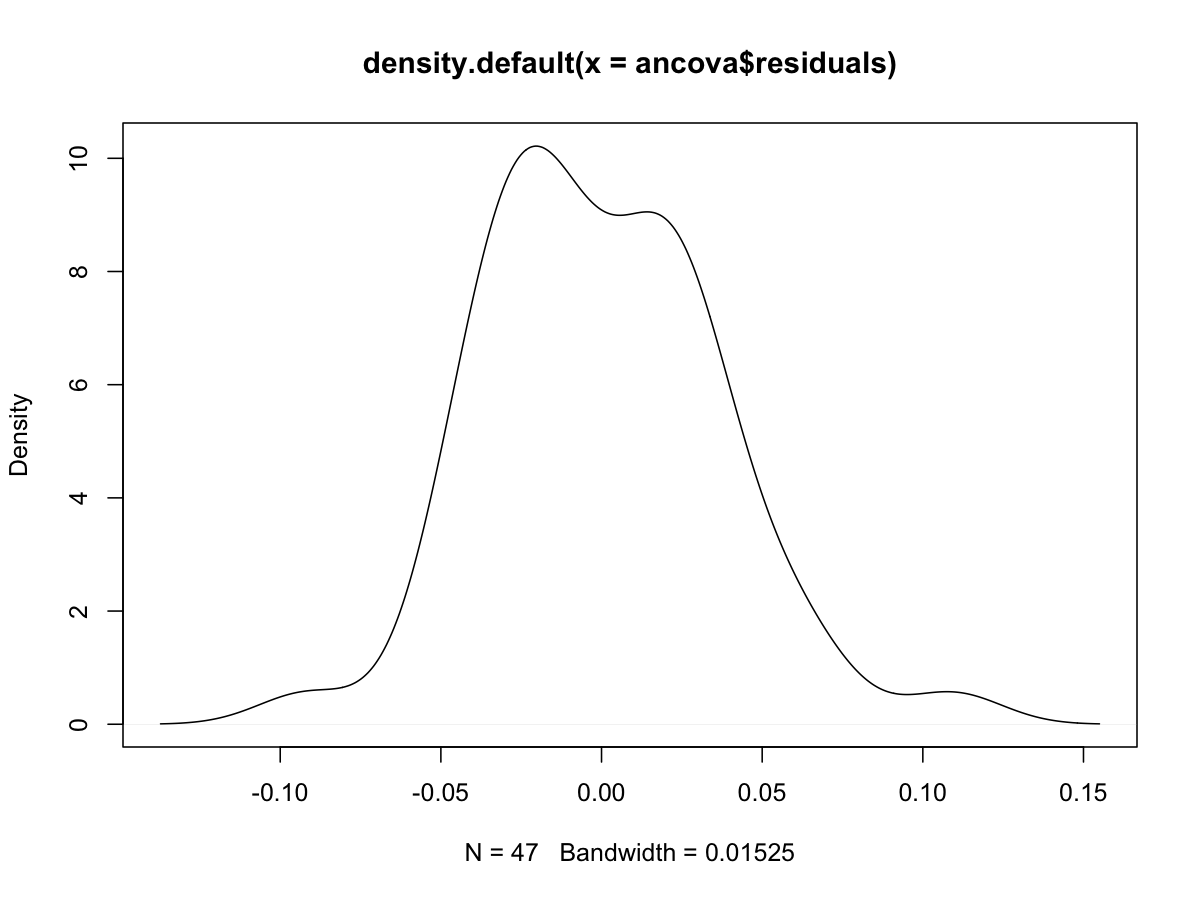

In [94]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)
plot(density(ancova$residuals))

> Does it look normal? There's a tiny shoulder there. Is it bimodal?

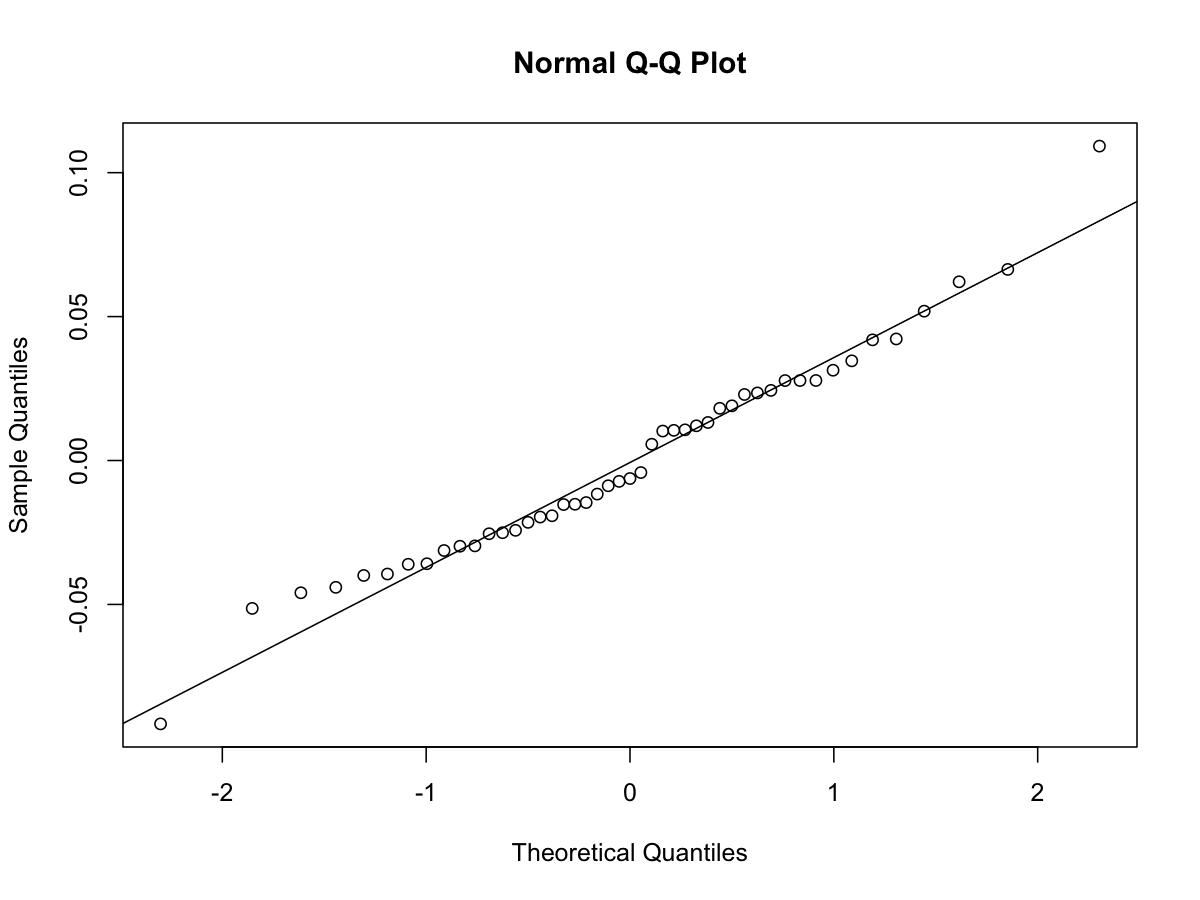

In [96]:
qqnorm(ancova$residuals)
qqline(ancova$residuals, datax = FALSE, distribution = qnorm, probs = c(0.25, 0.75))

> Q-Q plot looks pretty good to me. I think the data is pretty normal.

### a plot of fitted values vs. residuals, looking for patterns

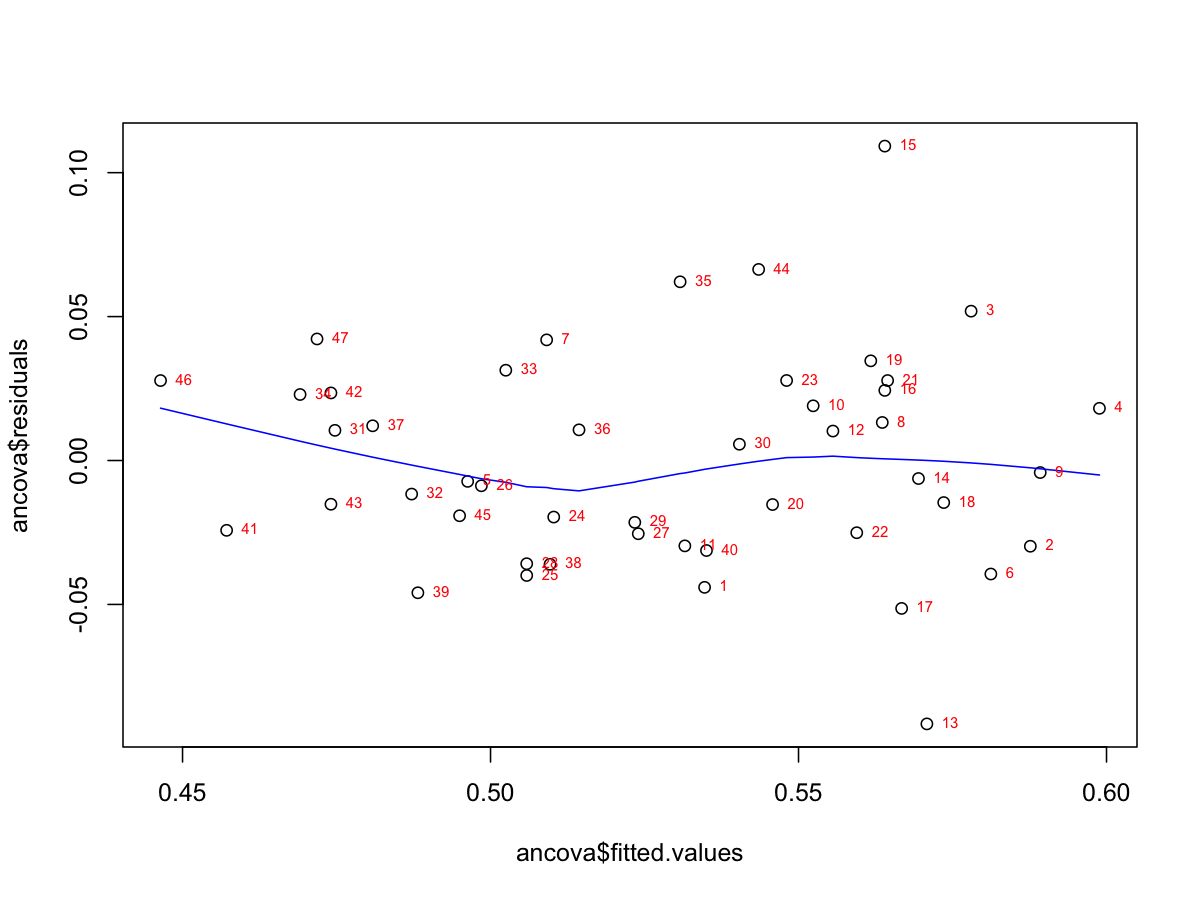

In [98]:
plot(ancova$residuals~ancova$fitted.values)
lines(lowess(ancova$fitted.values,ancova$residuals), col="blue")
text(ancova$fitted.values, ancova$residuals, row.names(dataHFD), cex=0.6, pos=4, col="red")

> I see no pattern here, so the variation is homogeneous and no transformation is needed.

### Interpreting ANCOVA output

In [131]:
data %>%
    group_by(vars) %>%
    summarise(r = spearman.ci(avgEE, Cal_cum)$estimate,
             pvalue = cor.test(avgEE, Cal_cum, method = "spearman")$p.value,
             lower = spearman.ci(avgEE, Cal_cum)$conf.int[1],
             upper = spearman.ci(avgEE, Cal_cum)$conf.int[2])

vars    r          pvalue      lower       upper    
1 LFD     0.53146853 0.079302939 -0.09629630 0.9142857
2 HFD     0.03496503 0.921184083 -0.73076923 0.7785714
3 HFD+LXN 0.81818182 0.002027199  0.47857143 0.9565217
4 HFD+HXN 0.27272727 0.391232746 -0.41935484 0.8932384
5 HFD+TXN 0.61818182 0.047816905 -0.08653846 0.9710145

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



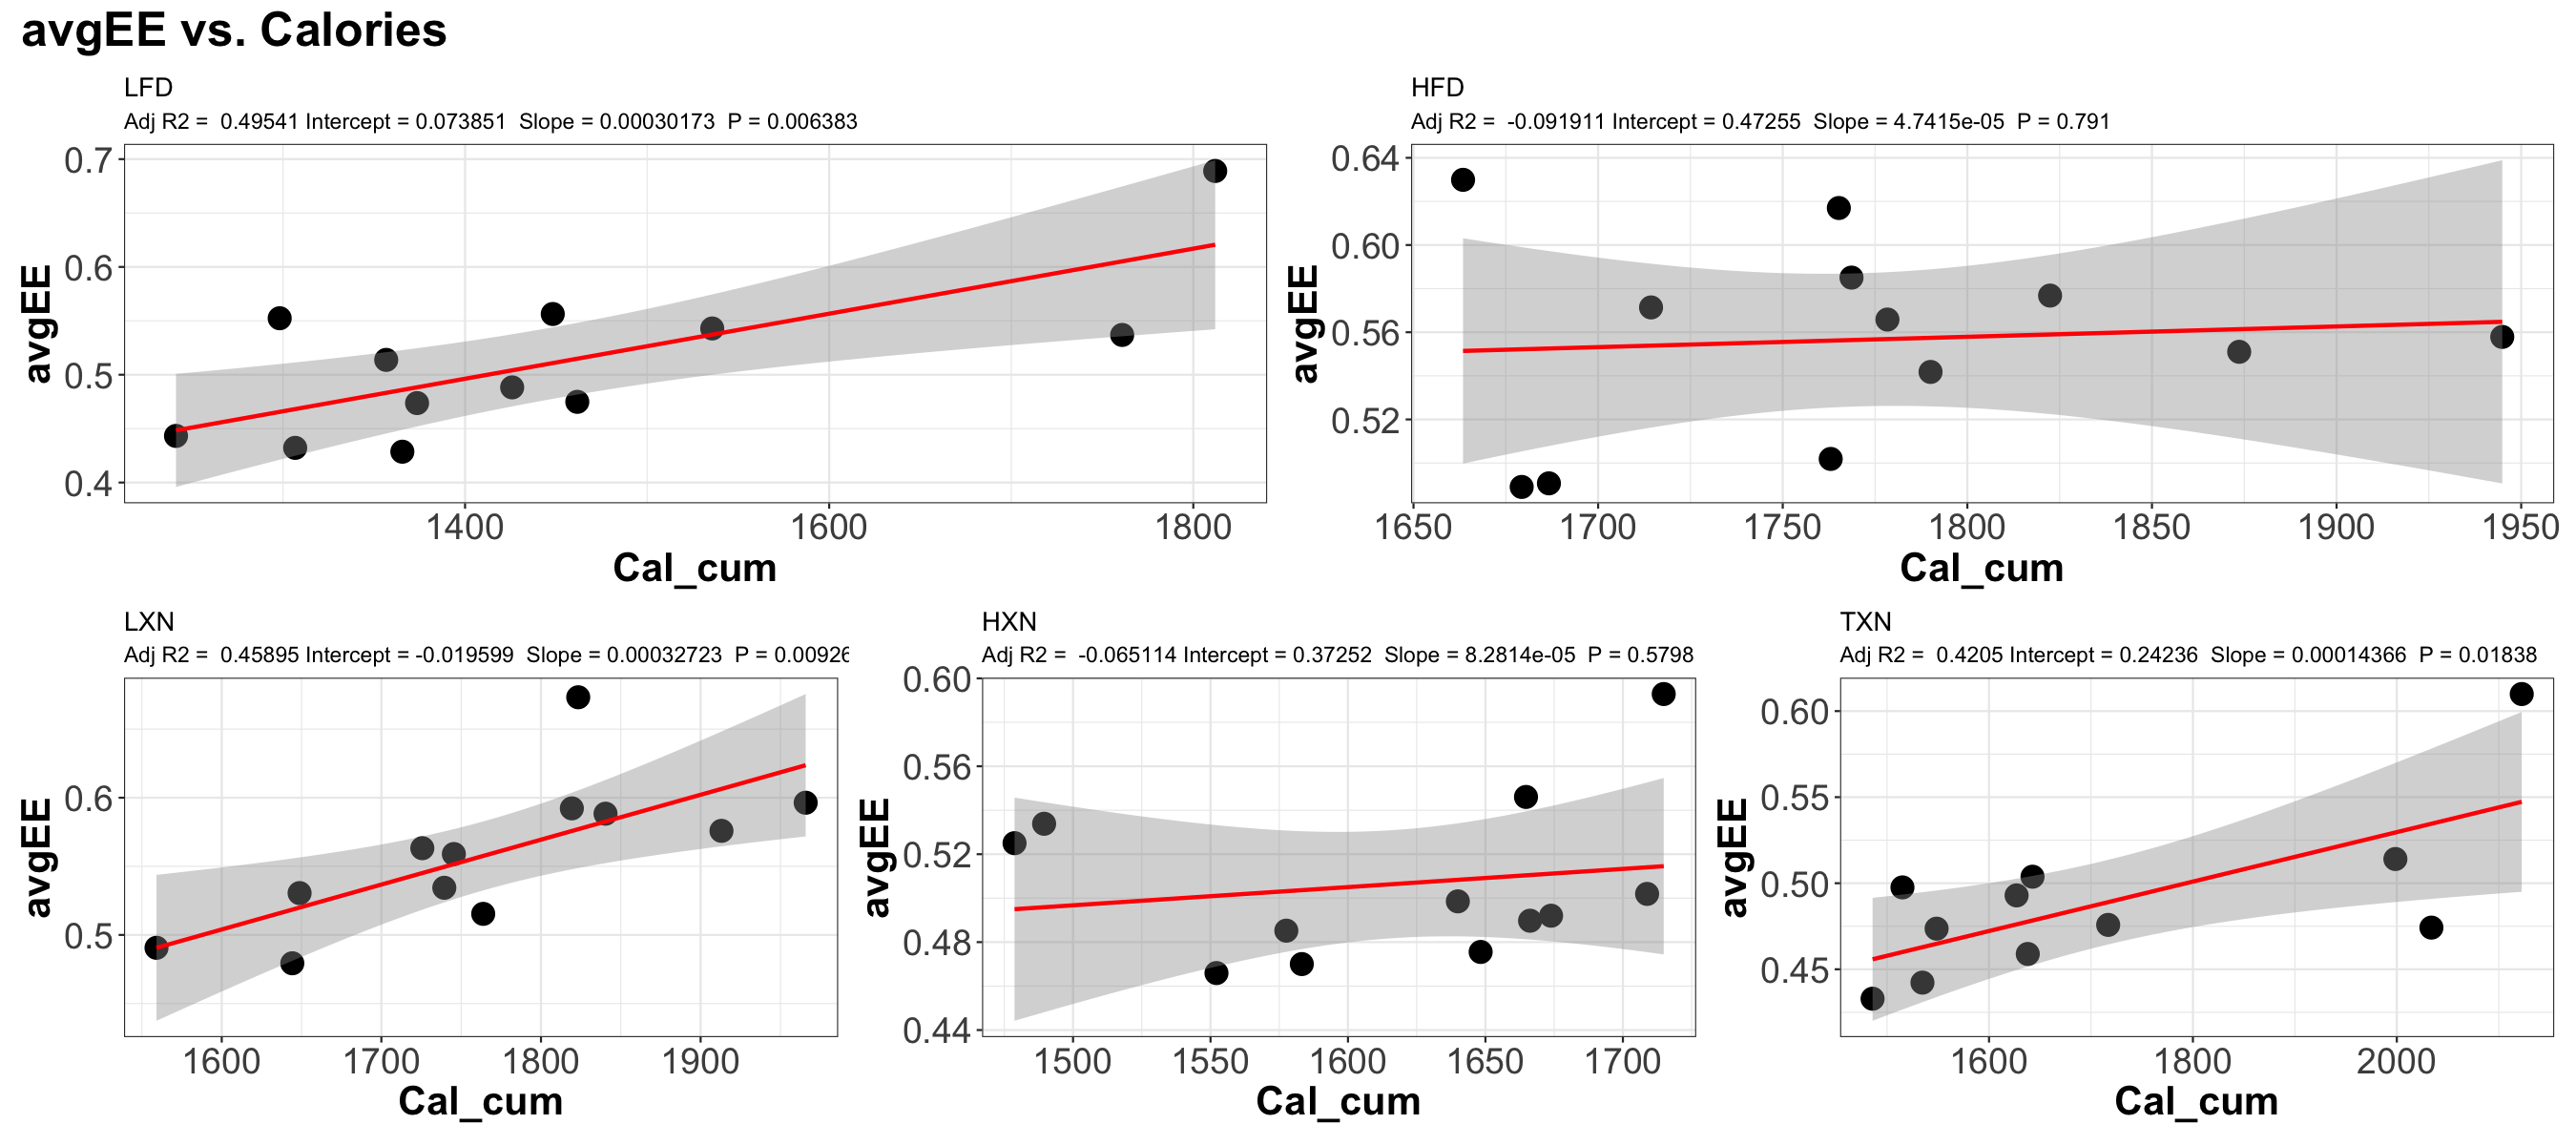

In [144]:
options(repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 150)
lfd_steatosis <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = lfd)) + ggtitle("LFD")
hfd_steatosis <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = hfd))+ ggtitle("HFD")
lxn_steatosis <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = lxn))+ ggtitle("LXN")
hxn_steatosis <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = hxn))+ ggtitle("HXN")
txn_steatosis <- ggplotRegression2(lm(avgEE ~ Cal_cum, data = txn))+ ggtitle("TXN")
(lfd_steatosis | hfd_steatosis) / (lxn_steatosis |hxn_steatosis | txn_steatosis) + 
plot_annotation(title = 'avgEE vs. Calories', 
                theme = theme(title = element_text(size = 20, face = 2)))

In [100]:
anova(ancova)

Df Sum Sq      Mean Sq     F value   Pr(>F)     
Treatment     3 0.043276716 0.014425572  9.134502 0.000104931
wt            1 0.024609603 0.024609603 15.583193 0.000320243
Treatment:wt  3 0.005049408 0.001683136  1.065789 0.374710820
Residuals    39 0.061590363 0.001579240        NA          NA

> This output shows that the interaction term is not significant. That means that body weight influences energy expenditure **independent of the treatment**.

> Energy expenditure increased significantly as body weight increased (ANCOVA, F = 15.58, df = 1?, p < 0.001 ). This pattern was similar for different XN treatments (F = 9.13, df = 3, p < 0.001 ). The relationship between energy expenditure and body weight is independent on treatment (ANCOVA, F = 1.07, df = 3, p = 0.37).

In [116]:
ancova2 <- lm(avgEE~Treatment*Lean_mass*Fat_mass, dataHFD)

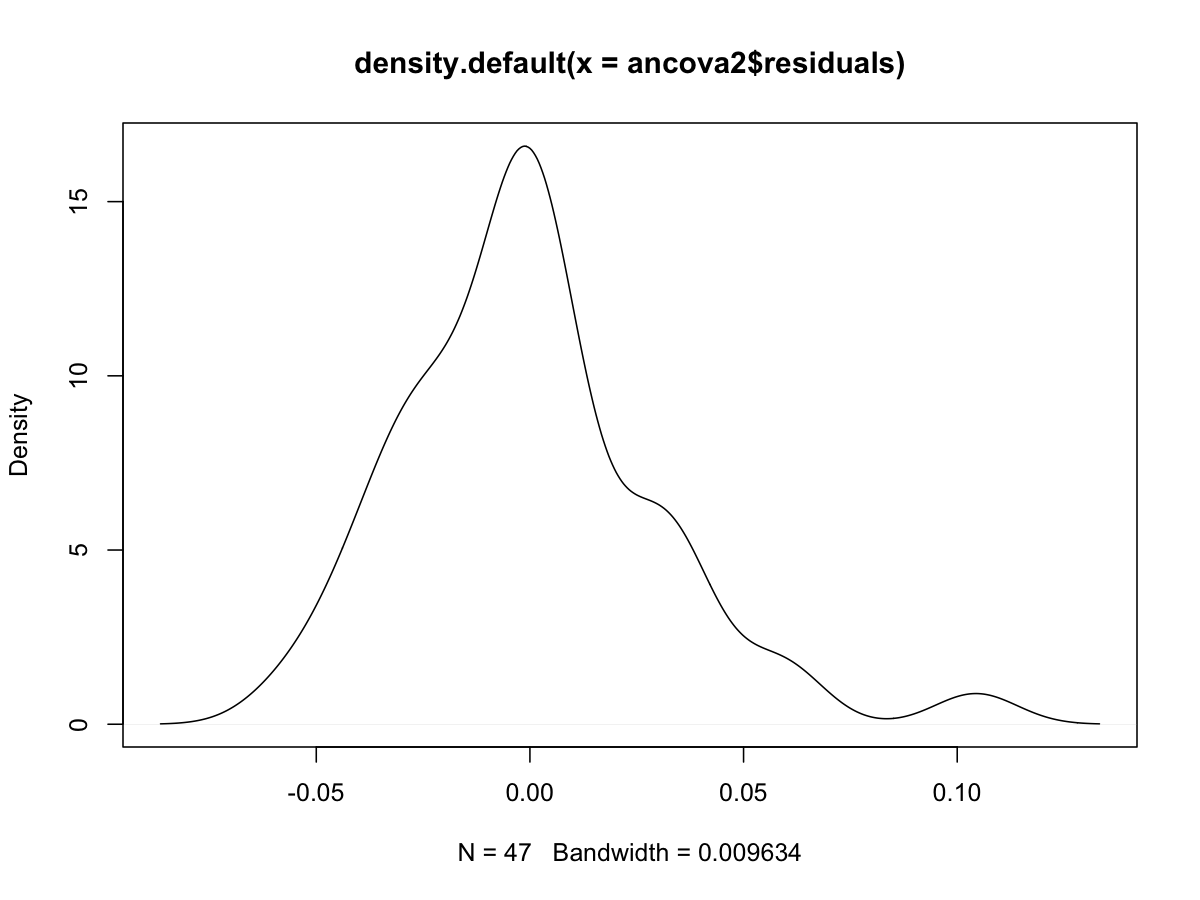

In [117]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)
plot(density(ancova2$residuals))

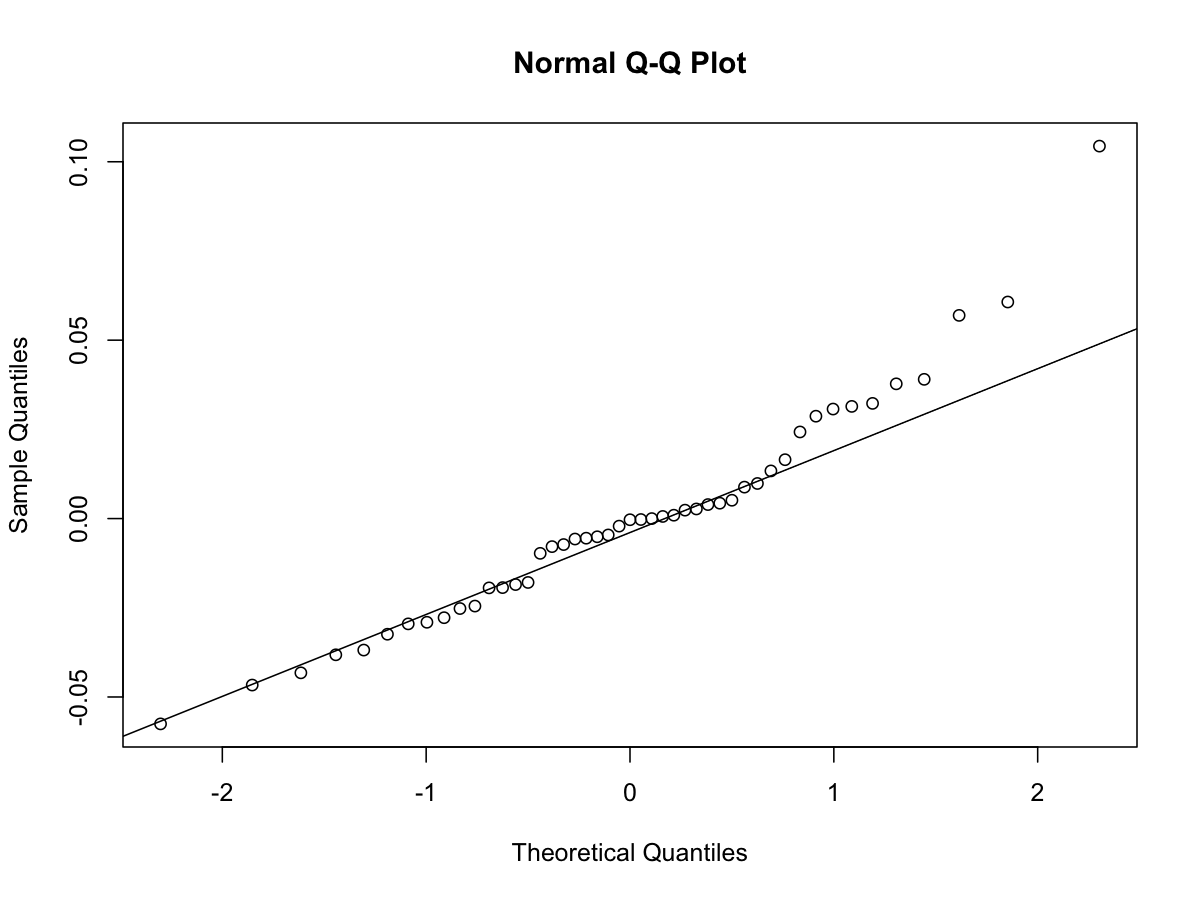

In [118]:
qqnorm(ancova2$residuals)
qqline(ancova2$residuals, datax = FALSE, distribution = qnorm, probs = c(0.25, 0.75))

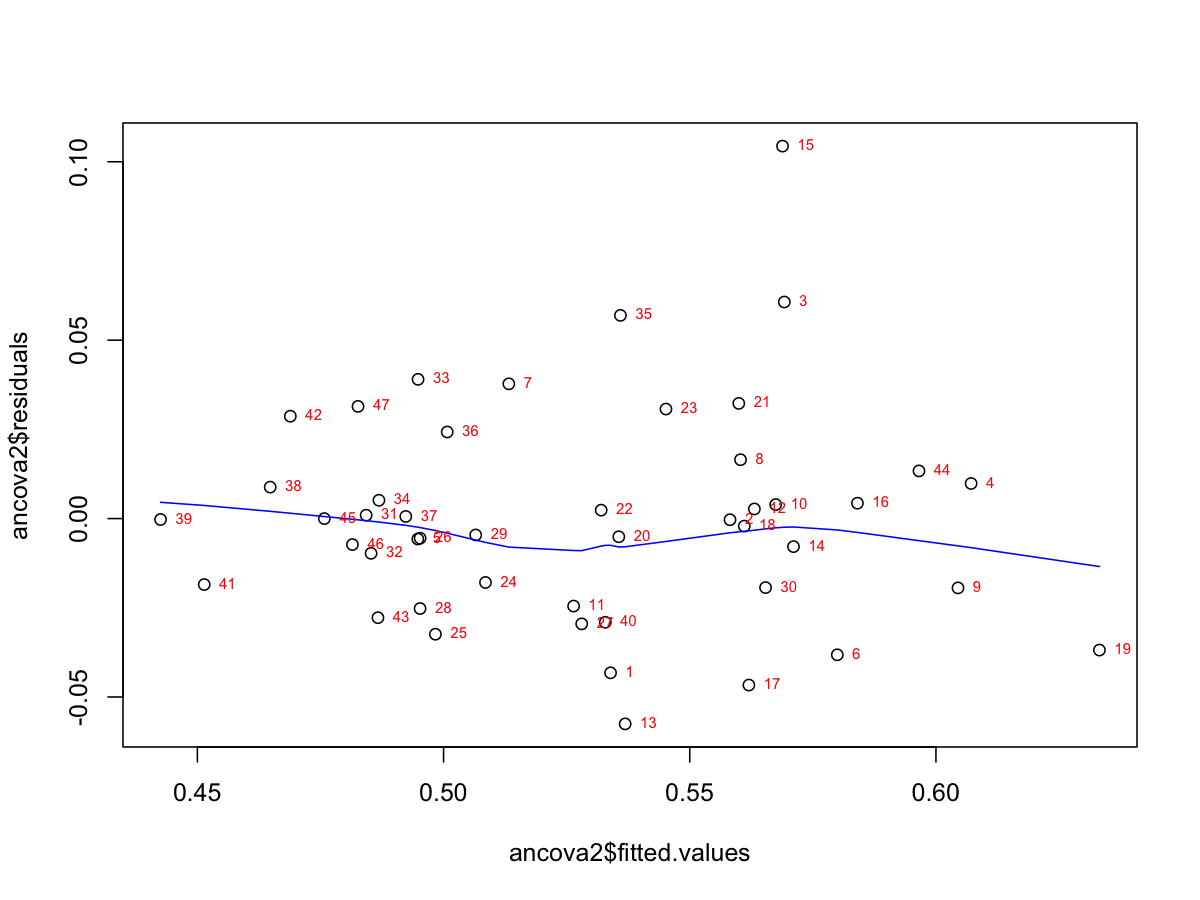

In [119]:
plot(ancova2$residuals~ancova2$fitted.values)
lines(lowess(ancova2$fitted.values,ancova2$residuals), col="blue")
text(ancova2$fitted.values, ancova2$residuals, row.names(dataHFD), cex=0.6, pos=4, col="red")

In [120]:
anova(ancova2)

Df Sum Sq      Mean Sq      F value   
Treatment                     3 0.043276716 0.0144255719 10.5118470
Lean_mass                     1 0.034920119 0.0349201189 25.4461278
Fat_mass                      1 0.001364450 0.0013644496  0.9942680
Treatment:Lean_mass           3 0.001484777 0.0004949257  0.3606500
Treatment:Fat_mass            3 0.005962713 0.0019875710  1.4483338
Lean_mass:Fat_mass            1 0.001432469 0.0014324689  1.0438334
Treatment:Lean_mass:Fat_mass  3 0.003543062 0.0011810208  0.8606044
Residuals                    31 0.042541784 0.0013723156         NA
                             Pr(>F)      
Treatment                    6.277741e-05
Lean_mass                    1.891052e-05
Fat_mass                     3.264215e-01
Treatment:Lean_mass          7.818137e-01
Treatment:Fat_mass           2.477372e-01
Lean_mass:Fat_mass           3.148389e-01
Treatment:Lean_mass:Fat_mass 4.718449e-01
Residuals                              NA

In [125]:
ancova3 <- lm(avgEE~Treatment*Lean_mass*epi_wat*subq_wt, dataHFD)

In [126]:
anova(ancova3)

Df Sum Sq       Mean Sq      F value   
Treatment                            3 0.0432767156 0.0144255719  9.7249241
Lean_mass                            1 0.0349201189 0.0349201189 23.5412163
epi_wat                              1 0.0055018162 0.0055018162  3.7090208
subq_wt                              1 0.0023136794 0.0023136794  1.5597549
Treatment:Lean_mass                  3 0.0046174798 0.0015391599  1.0376167
Treatment:epi_wat                    3 0.0004504466 0.0001501489  0.1012221
Lean_mass:epi_wat                    1 0.0001738965 0.0001738965  0.1172314
Treatment:subq_wt                    3 0.0029903095 0.0009967698  0.6719672
Lean_mass:subq_wt                    1 0.0002880768 0.0002880768  0.1942054
epi_wat:subq_wt                      1 0.0002446105 0.0002446105  0.1649029
Treatment:Lean_mass:epi_wat          3 0.0067223953 0.0022407984  1.5106226
Treatment:Lean_mass:subq_wt          3 0.0007207160 0.0002402387  0.1619556
Treatment:epi_wat:subq_wt            3 0.0047538343 0.0015846114  1.0682576
Lean_mass:epi_wat:subq_wt            1 0.0023747856 0.0023747856  1.6009494
Treatment:Lean_mass:epi_wat:subq_wt  3 0.0029267960 0.0009755987  0.6576948
Residuals                           15 0.0222504129 0.0014833609         NA
                                    Pr(>F)      
Treatment                           0.0008226078
Lean_mass                           0.0002112733
epi_wat                             0.0732887083
subq_wt                             0.2308410067
Treatment:Lean_mass                 0.4043074896
Treatment:epi_wat                   0.9580667983
Lean_mass:epi_wat                   0.7368073545
Treatment:subq_wt                   0.5823940841
Lean_mass:subq_wt                   0.6657241536
epi_wat:subq_wt                     0.6904161454
Treatment:Lean_mass:epi_wat         0.2523768586
Treatment:Lean_mass:subq_wt         0.9202881410
Treatment:epi_wat:subq_wt           0.3920630468
Lean_mass:epi_wat:subq_wt           0.2250714049
Treatment:Lean_mass:epi_wat:subq_wt 0.5906219614
Residuals                                     NA

In [77]:
fit = aov(avgEE~Treatment+wt, dataHFD)

In [78]:
Anova(fit, type="III")

Sum Sq      Df F value   Pr(>F)     
(Intercept) 0.015751092  1  9.927193 0.002999633
Treatment   0.008825554  3  1.854114 0.152108433
wt          0.024609603  1 15.510307 0.000303563
Residuals   0.066639771 42        NA          NA

In [79]:
summary(Anova(fit, type="III"))

     Sum Sq               Df           F value           Pr(>F)         
 Min.   :0.008826   Min.   : 1.00   Min.   : 1.854   Min.   :0.0003036  
 1st Qu.:0.014020   1st Qu.: 1.00   1st Qu.: 5.891   1st Qu.:0.0016516  
 Median :0.020180   Median : 2.00   Median : 9.927   Median :0.0029996  
 Mean   :0.028957   Mean   :11.75   Mean   : 9.097   Mean   :0.0518039  
 3rd Qu.:0.035117   3rd Qu.:12.75   3rd Qu.:12.719   3rd Qu.:0.0775540  
 Max.   :0.066640   Max.   :42.00   Max.   :15.510   Max.   :0.1521084  
                                    NA's   :1        NA's   :1          

In [80]:
posth = glht(fit, linfct=mcp(Treatment='Tukey'))
summary(posth)
emmeans(fit, ~ Treatment:wt)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = avgEE ~ Treatment + wt, data = dataHFD)

Linear Hypotheses:
                        Estimate Std. Error t value Pr(>|t|)
HFD+HXN - HFD == 0     -0.032575   0.016861  -1.932    0.228
HFD+LXN - HFD == 0      0.003722   0.016270   0.229    0.996
HFD+TXN - HFD == 0     -0.018409   0.020827  -0.884    0.811
HFD+LXN - HFD+HXN == 0  0.036297   0.016732   2.169    0.146
HFD+TXN - HFD+HXN == 0  0.014166   0.018489   0.766    0.867
HFD+TXN - HFD+LXN == 0 -0.022131   0.020519  -1.079    0.701
(Adjusted p values reported -- single-step method)


 Treatment   wt emmean     SE df lower.CL upper.CL
 HFD       47.6  0.540 0.0122 42    0.515    0.565
 HFD+HXN   47.6  0.507 0.0115 42    0.484    0.531
 HFD+LXN   47.6  0.544 0.0121 42    0.519    0.568
 HFD+TXN   47.6  0.522 0.0146 42    0.492    0.551

Confidence level used: 0.95 

In [82]:
fit2 = aov(avgEE~Treatment+Lean_mass+subq_wt+epi_wat+mesenteric_wt, dataHFD)

In [83]:
Anova(fit2, type="III")

Sum Sq      Df F value    Pr(>F)     
(Intercept)   0.008957363  1  7.6334443 0.008696930
Treatment     0.001949577  3  0.5538084 0.648650854
Lean_mass     0.012436809  1 10.5986204 0.002343872
subq_wt       0.004634963  1  3.9499046 0.053928766
epi_wat       0.004981428  1  4.2451618 0.046077937
mesenteric_wt 0.002749733  1  2.3433162 0.133893412
Residuals     0.045764027 39         NA          NA

# Conclusions

**XN or TXN treatment did not change energy expenditure.**
From 4.2, when controlled for body weight, treatment no longer influences the energy expenditure. 

In [84]:
dataHFD %>%
    summarise(r = pearson.ci(avgEE, epi_wat)$estimate,
             pvalue = cor.test(avgEE, epi_wat, method = "pearson")$p.value,
             lower = pearson.ci(avgEE, epi_wat)$conf.int[1],
             upper = pearson.ci(avgEE, epi_wat)$conf.int[2])

r          pvalue       lower      upper     
1 -0.6189573 3.524866e-06 -0.7691242 -0.4134605

In [86]:
dataHFD %>%
    group_by(vars) %>%
    summarise(r = pearson.ci(avgEE, epi_wat)$estimate,
             pvalue = cor.test(avgEE, epi_wat, method = "pearson")$p.value,
             lower = pearson.ci(avgEE, epi_wat)$conf.int[1],
             upper = pearson.ci(avgEE, epi_wat)$conf.int[2])

vars    r          pvalue      lower      upper      
1 HFD     -0.6410418 0.024682233 -0.9180802  0.02601782
2 HFD+LXN -0.5780153 0.049009647 -0.8457834 -0.18035492
3 HFD+HXN -0.7302963 0.006995394 -0.9304595  0.05447930
4 HFD+TXN -0.2734864 0.415794018 -0.8794095  0.45486235

In [87]:
dataHFD %>%
    group_by(vars) %>%
    summarise(r = pearson.ci(avgEE, subq_wt)$estimate,
             pvalue = cor.test(avgEE, subq_wt, method = "pearson")$p.value,
             lower = pearson.ci(avgEE, subq_wt)$conf.int[1],
             upper = pearson.ci(avgEE, subq_wt)$conf.int[2])

vars    r           pvalue     lower        upper    
1 HFD      0.60223294 0.03824865  0.267661248 0.8572614
2 HFD+LXN  0.55160552 0.06299570  0.002127442 0.8223063
3 HFD+HXN  0.20052867 0.53203082 -0.226895439 0.6497782
4 HFD+TXN -0.08462104 0.80462159 -0.634709769 0.4540163

In [109]:
ancova3 <- lm(avgEE~Treatment+wt, dataHFD)

In [110]:
anova(ancova)

Df Sum Sq      Mean Sq     F value   Pr(>F)     
Treatment     3 0.043276716 0.014425572  9.134502 0.000104931
wt            1 0.024609603 0.024609603 15.583193 0.000320243
Treatment:wt  3 0.005049408 0.001683136  1.065789 0.374710820
Residuals    39 0.061590363 0.001579240        NA          NA

In [127]:
anova(lm(avgEE~wt*Treatment, dataHFD))

Df Sum Sq      Mean Sq     F value   Pr(>F)      
wt            1 0.059060764 0.059060764 37.398218 3.580379e-07
Treatment     3 0.008825554 0.002941851  1.862827 1.518734e-01
wt:Treatment  3 0.005049408 0.001683136  1.065789 3.747108e-01
Residuals    39 0.061590363 0.001579240        NA           NA

In [129]:
anova(lm(avgEE~Treatment*wt, dataHFD))

Df Sum Sq      Mean Sq     F value   Pr(>F)     
Treatment     3 0.043276716 0.014425572  9.134502 0.000104931
wt            1 0.024609603 0.024609603 15.583193 0.000320243
Treatment:wt  3 0.005049408 0.001683136  1.065789 0.374710820
Residuals    39 0.061590363 0.001579240        NA          NA